<h2><center> 🏠 📃 Rental & Buying Properties – The Real Estate Tyrone In 21st Century 💸 🍃 </center></h2>

<h4><center> From Raw Data To Analytic Insights: Predictive Reasoning & Empirical Data </center></h4>

<p><b>Dataset Author:</b> Cresht. (2025). </p>

<p><b>Official Source:</b> BatDongSanVN. 
<a href="https://batdongsan.vn/" target="_blank">[Link]</a></p>

<p><b> Launch Date:</b> September 19th, 2025 - Present (2026) </p>

<p><b>Successors</b>:
    <ul>
        <li> Trung, T, Trung, L, Nghi, N & Hai, N. (2023). <i> Group 16 - House Price Prediction - 21KDL </i>. Github. <a href="https://github.com/TrungNotHot/House-Price-Prediction" target="_blank">[Repository]</a></li>
        <li> Surjyanee. (2020). <i> Linear-Regression Model for House Price Prediction </i>. Github. <a href = "https://github.com/huzaifsayed/Linear-Regression-Model-for-House-Price-Prediction">[Repository]</a></li>
        <li> Rishabh, T. (2022). <i> House Price Prediction </i>. Github. <a href = "https://github.com/Rishabh-Tripathi1/House-Price-Prediction"> [Repository]</a></li>
    </ul>
</p>

<p><b>EDA Revision & Extension:</b> Cresht </p>

### 🎨 Abstract 🌌 ###

<b>Housing demand</b>, especially among young people residing in major cities, has become a significant challenge. As individuals strive for stability and a comfortable environment, owning a home is often considered to be a key milestone. However, this objective can be difficult due to a variety of external and internal factors.

This struggle is particularly evident in what Jennifer, H. (2017) refers to as <b>"Generation Rent"</b>, a generation that:
- Has limited access to social housing and homeownership
- Is increasingly dependent on long-term rental sectors

Therefore, this analysis is designed to accomodate with the primary goals:
- Understand user preferences in housing attributes and settings
- Identify patterns and trends in the real estate market
- Provide insights and initial assumptions to better anticipate future marketplace behaviour.

<b> References </b>

- Jennifer, H., McKee, K., Tom, M., Adriana, M. (2017). *‘Generation Rent’ and the ability to ‘settle down’: economic and geographical variation in young people’s housing transitions*. Journal of Youth Studies, 20(1), 63–78. https://doi.org/10.1080/13676261.2016.1184241

### 📚 Libraries 🔖 ###

Several libraries have been ultilized to perform data visualisations, lightweight feature engineering, and related compational opertaions, including Numpy, Pandas, Matplotlib (plus Seaborn) and Scikit-learn. Regarding sentimental analysis and traditional language preprocessing tasks, underthesea - a Vietnamese NLP toolkit - is chosen over NLTK due to its stronger compatibility with Vietnamese linguistic features, such as grammar, syntax and semantic analysis.

In [120]:
#========================== Backbone of the exploratory analysis ==========================
#Feature Engineering
import numpy as np
import pandas as pd
import seaborn as sns

#Visualisation
import matplotlib.pyplot as plt
import matplotlib.figure
import matplotlib.cm as cm

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

# NLP
!pip install underthesea
from underthesea import word_tokenize
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

#========================== Miscellaneous ==========================
#Extension for multiple savestates
import sys, os, math, string, re

# Relative path import
from pathlib import Path

#Timeline estimation
from datetime import datetime, timedelta

#Mathematical operations
from math import ceil, pi

#Deprecation Warning Surpass
import warnings
warnings.filterwarnings('ignore')

#Aggregation
from functools import reduce
from collections import Counter

#Savestates graph
plot_all = {}

### 🗃️ Data Pipeline 📦 ###

The processing system is built using the Strategy Pattern, where:
- Each preprocessing operation (encoding, scaling, imputing, etc.) is implemented as a strategy
- Strategies share a common interface (PreprocessingStrategy class)
- A pipeline (PreprocessingPipeline) orchestrates the applying order of these strategies

This design is specifically important so as to make preprocessing <b>modular, extensible</b> and <b>reproducible</b>, thereby guaranteeing object-oriented principles: Open/Closed Principle, Single Responsibility & Loose Coupling 

In [121]:
project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
src_path = os.path.join(project_root)

if src_path not in sys.path:
    sys.path.append(src_path)

#Import necessary preprocessing features
from workarounds.preprocessing.feature_preprocessing.encoders.label_encoder import LabelEncoding
from workarounds.preprocessing.feature_preprocessing.encoders.target_encoder import TargetEncoding
from workarounds.preprocessing.feature_preprocessing.encoders.one_hot_encoder import OneHotEncoding
from workarounds.preprocessing.feature_preprocessing.scalers.minmax_scaler import MinMaxScaling
from workarounds.preprocessing.feature_preprocessing.scalers.standard_scaler import StandardScaling
from workarounds.preprocessing.feature_preprocessing.normalization.normalizer import Normalizing
from workarounds.preprocessing.feature_preprocessing.outliers.iqr_removal import IQRMethod
from workarounds.preprocessing.feature_preprocessing.outliers.zscore_removal import ZScoreMethod
from workarounds.preprocessing.feature_preprocessing.transformers.boxcox import BoxCoxTransformer
from workarounds.preprocessing.feature_preprocessing.transformers.yeo_johnson import YeoJohnsonTransformer
from workarounds.preprocessing.feature_preprocessing.pipeline import PreprocessingPipeline

### 📜 Introduction 🪶 ###

Preliminary procedures for scraping techniques involve using BeautifulSoup and asynchronous HTTP requests - responses. The process takes several days of setup, enhancement, trials and errors before constructing the complete dataset. 

From a real estate perspective, the datasets (rental and buying) consist of approximately 4.8 and 67 thousands entities respectively and capture a wide range of influential features, including area size, number of bedrooms, bathrooms, floors and locational characteristics such as frontage positioning. Temporal attributes such as listing release dates, further enhance the dataset by allowing historical trend analysis, seasonal demand captures and price difference over time. 

In [122]:
# Buying properties folder path
data_path = os.path.join('..', 'data', 'raw', 'house_buying_dec29th_2025.csv')

# Load the dataset
df_1 = pd.read_csv(data_path)
df_1.head()

id                                         detail_url  \
0  196958  https://batdongsan.vn/ban-nha-nguyen-son-long-...   
1  196967  https://batdongsan.vn/ban-nha-hem-xe-hoi-4m-2-...   
2  196983  https://batdongsan.vn/o-to-ngu-nha-62m2-5-tang...   
3  196962  https://batdongsan.vn/ban-nha-phuc-loi-ngo-non...   
4  196972  https://batdongsan.vn/tran-duy-hung-6-tang-tha...   

                                               title                 location  \
0  Bán nhà Nguyễn Sơn Long Biên- Dân trí Tuyệt vờ...        Long Biên, Hà Nội   
1  BÁN NHÀ HẺM XE HƠI 4M, 2 MẶT TIỀN - 2 TẦNG , N...  Bình Chánh, Hồ Chí Minh   
2  Ô TÔ NGỦ NHÀ – 62M² – 5 Tầng/4PN – Gần kdc CIT...      Gò Vấp, Hồ Chí Minh   
3  Bán nhà Phúc Lợi - ngõ nông - ô tô vào nhà - t...        Long Biên, Hà Nội   
4  TRẦN DUY HƯNG - 6 TẦNG THANG MÁY - NGÕ THÔNG D...         Cầu Giấy, Hà Nội   

   timeline_hours  area_m2  bedrooms  bathrooms  floors  frontage  \
0               2     50.0       4.0        4.0     6.0     False   
1               2     98.0       4.0        4.0     3.0      True   
2               2     62.0       4.0        5.0     6.0     False   
3               2     39.0       3.0        4.0     6.0     False   
4               2     45.0       3.0        3.0     7.0      True   

   price_million_vnd  
0            12500.0  
1             5500.0  
2             8740.0  
3             6500.0  
4            16980.0

In [123]:
# Rental properties folder path
data_path_2 = os.path.join('..', 'data', 'raw', 'house_rental_dec29th_2025.csv')

# Load the dataset
df_2 = pd.read_csv(data_path_2)
df_2.head()

id                                         detail_url  \
0  196787  https://batdongsan.vn/cho-thue-nha-mat-tien-th...   
1  196777  https://batdongsan.vn/thue-nha-nguyen-can-hxt-...   
2  196689  https://batdongsan.vn/linhhk-cho-thue-nha-hoan...   
3  142301  https://batdongsan.vn/cho-thue-toa-nha-2-mat-t...   
4  142012  https://batdongsan.vn/10-trieuthang-cho-thue-n...   

                                               title              location  \
0  Cho thuê nhà Mặt Tiền Thạch Lam 92m², 4TẦNG - ...  Tân Phú, Hồ Chí Minh   
1  Thuê nhà nguyên căn HXT  lô góc Quận 8, 4 tầng...   Quận 8, Hồ Chí Minh   
2  LinhHK cho thuê nhà Hoàn Kiếm – 150m² x 5 tầng...     Hoàn Kiếm, Hà Nội   
3  Cho thuê Tòa nhà 2 Mặt tiền Diệp Minh Châu 160...  Tân Phú, Hồ Chí Minh   
4  🏠 10 triệu/tháng 🏠 CHO THUÊ NHÀ NGUYÊN CĂN 3 T...   Huế, Thừa Thiên Huế   

   timeline_hours  area_m2  bedrooms  bathrooms  floors  frontage  \
0              48     92.0       5.0        5.0     5.0      True   
1              48     70.0       8.0        4.0     5.0     False   
2              72    150.0       NaN        NaN     6.0     False   
3            7200    160.0      10.0        9.0     6.0      True   
4            7200    112.0       3.0        2.0     4.0     False   

   price_million_vnd  
0               34.0  
1               30.0  
2               80.0  
3               75.0  
4               10.0

<b> House properties </b>: ID, Detailed URL, Title, Location (District / Ward, City / Province), Timeline (Hours), Area (m2), Bedroom, Bathroom, Frontage, Floors, Price (Million VND).

### 🚧 Dataset Characteristics: Uniqueness & Challenges 🚫 ###

#### 🌟 What Makes This Dataset Unique ####

- Rich real estate attributes
    - Each listing contains a unique ID and specific URL
    - Helps in duplicated entity detection and record management
- Hierarchical location structure
    - Location is organized by ward, district and province (city), later will be redefined as ward and province due to the following emergence in 2025.
    - Enables spatial and regional analysis
- Informative listing headlines
    - Headlines encode qualitative signals such as:
        - Urgency (e.g. "Bán gấp")
        - Exaggeration (e.g. "Giá cả rẻ bèo, hợp lí")
        - Compromise on negotation senses
    - These signals may implicitly reflect seller behaviour and market sentiment

#### ⚠️ Key Challenges During Exploration ####

Despite its strengths, the dataset still presents several difficulties:
- Missing / Null Values
    - Common in core numerical features: Bedrooms, Bathrooms, Floors, which may bias model performance if not handled carefully.
- Title Format Inconsistencies
    - Listing headlines show inconsistent formatting and mixed languages between Vietnamese and English
    - Therefore, the complexity of NLP (Natural Language Processing) and feature extraction increases.
- Composite Attributes 
    - Some features combine multiple pieces of administrative units and timeline-related attributes
    - Require decomposition into multil-layer components for meaningful interpretation.
- Imbalanced Geographic Distribution 
    - Listings are heavily concetrated on major provinces
    - Smaller provinces are underrepresented
    - Raises the risks of model overfitting and poor generalization.
- Price Scale & Unit Normalization 
    - Prices are recorded into million VND
    - Requires converting to billion VND to improve intepretability and stabilize model predictions.

### 🌱 Categorical Features: Key Values & Insights 🎋 ###

The initial inspection of the dataset reveals several noticable patterns influence customer preferences and housing prices
- 💰 Key Factors Affecting Prices
    - Frontage attribute shows a strong impact on price definition
    - Location plays a pivotal role, with higher prices observed in major cities: Ha Noi, Ho Chi Minh City, Binh Duong, Da Nang
- 📝 Listing Title Characteristics
    - Listing titles are generally short and concise
    - Commonly include key property highlights and contact information
    - Nevertheless, this structure is not completely consistent across all listings.
- 🏡 Buyer Attraction Signals
A surface-level analysis of descriptive suggests that the following features strongly attract potential buyers:
    - Pleasant views
    - Balconies
    - Convenient or central locations
    - Perceived affordability
- 👨‍👩‍👧‍👦 Household Preferences
    - Most properties are designed for family-sized households
    - Primary configurations include:
        - 2 - 3 bedrooms, closely aligning with bathroom properties
        - Atleast 2 floors, including ground floor accounted.
- 📉 Price Distribution Over Regions
    - Listings belowed 2 million VND are extremely rare
    - When such listings appear, they are typically situated in remote and less-developed areas.

### 📝 Static information 📒 ###

This section summarizes the key statistical information about Buying and Rental datasets, highlighting differences in scale, property structure, pricing, and data completeness.

#### 1. Surface-level inspection ####

Both rental and buying datasets contain 7 numerical features, especially the identification and timeline hours which is being preserved in integer formats.
- 📊 Buying Dataset Description
    - 🔢 Data Volume & Completeness
        - Most attributes have high coverages, particularly timeline_hours, area_m2 and price_million_vnd
        - Whereas some missing values remain in bedrooms, bathrooms, floors. Such gaps require careful preprocessing to avoid bias
    - 🏗️ Property Characteristics
        - Area: The median value is around 60m2, while the extremely large values indicate the presence of outliers (e.g. compounds or data noise)
        - Bedrooms & Bathrooms: Median of 4 bedrooms and 3 bathrooms, suggesting a focus on family-sized or multi-generational housing
        - Floors: Most properties range between 3 and 6 floors, reflecting common country-side and urban housing structures.
    - 💰 Price Distribution
        - Median price is approximately 7 million VND
        - This price distribution shows very wide dispersion and strong right skewness
        - Maximum values reach nearly 1 billion VND, subtly introducing the existence of luxurious or special-use listings
- 🏢 Rental Dataset Description
    - 🔢 Data Volume & Completeness
        - Several attributes have significant missing values, notably area, bedrooms, bathrooms and floors, suggesting less standardized listing practices in rental markets
    - 🏗️ Property Characteristics
        - Area: Median value is around 90m2, but mean one is much higher because of large outliers.
        - Bedrooms & Bathrooms: Median of 3 bedrooms and 2 bathrooms, aligning with small-family or shared-living use cases.
        - Floors: Median of 4 floors, presumably presenting a mix of low-rise apartments or townhouses.
    - 💰 Rental Price Distribution
        - Median rental price is around 18 million VND
        - Lower quartile values are relatively small, reflecting luxury rentals, potential data inconsistencies or commercial properties

In [124]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66912 entries, 0 to 66911
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 66912 non-null  int64  
 1   detail_url         66905 non-null  object 
 2   title              66912 non-null  object 
 3   location           66912 non-null  object 
 4   timeline_hours     66912 non-null  int64  
 5   area_m2            50344 non-null  float64
 6   bedrooms           55273 non-null  float64
 7   bathrooms          51548 non-null  float64
 8   floors             52278 non-null  float64
 9   frontage           66912 non-null  bool   
 10  price_million_vnd  64809 non-null  float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 5.2+ MB


In [125]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4808 non-null   int64  
 1   detail_url         4808 non-null   object 
 2   title              4808 non-null   object 
 3   location           4808 non-null   object 
 4   timeline_hours     4808 non-null   int64  
 5   area_m2            3889 non-null   float64
 6   bedrooms           2981 non-null   float64
 7   bathrooms          3013 non-null   float64
 8   floors             2623 non-null   float64
 9   frontage           4808 non-null   bool   
 10  price_million_vnd  4691 non-null   float64
dtypes: bool(1), float64(5), int64(2), object(3)
memory usage: 380.4+ KB


In [126]:
df_1.describe()

id  timeline_hours       area_m2      bedrooms  \
count   66912.000000    66912.000000  5.034400e+04  55273.000000   
mean   141092.732768     8749.222666  1.377977e+03      4.429649   
std     32545.265005     6863.201079  2.763347e+05      4.500243   
min     80084.000000        2.000000  1.000000e+00      1.000000   
25%    116152.750000     3600.000000  4.200000e+01      3.000000   
50%    142310.000000     7200.000000  6.000000e+01      4.000000   
75%    168691.500000     8760.000000  9.200000e+01      5.000000   
max    197061.000000    26280.000000  6.200000e+07    127.000000   

          bathrooms        floors  price_million_vnd  
count  51548.000000  5.227800e+04       64809.000000  
mean       4.296617  1.477595e+04       13810.677155  
std        4.618477  3.377399e+06       35144.733752  
min        1.000000  0.000000e+00           0.000000  
25%        2.000000  3.000000e+00        4600.000000  
50%        3.000000  4.000000e+00        7000.000000  
75%        5.000000  6.000000e+00       12800.000000  
max      127.000000  7.722213e+08      989000.000000

In [127]:
df_2.describe()

id  timeline_hours        area_m2     bedrooms    bathrooms  \
count    4808.000000     4808.000000    3889.000000  2981.000000  3013.000000   
mean   147853.612937     7341.789933     479.713808     3.421671     3.101892   
std     31790.028799     6053.871585    3067.861668     3.309381     2.993337   
min     80085.000000        6.000000       1.000000     1.000000     1.000000   
25%    121156.250000     2880.000000      45.000000     1.000000     1.000000   
50%    149390.500000     5760.000000      90.000000     3.000000     2.000000   
75%    175541.250000     8760.000000     140.000000     4.000000     4.000000   
max    197050.000000    26280.000000  119138.000000    61.000000    50.000000   

            floors  price_million_vnd  
count  2623.000000        4691.000000  
mean      3.780404        4924.993075  
std       2.317604       57771.955479  
min       1.000000           0.000000  
25%       2.000000           8.000000  
50%       4.000000          18.000000  
75%       5.000000          40.000000  
max      60.000000      950000.000000

#### 2. NaN / Null & Missing Value Detection ####

<b>General Overview</b>: Identifier and location fields contain no missing values in both buying and rental datasets. Regarding property characteristics, area_m2, bedrooms, bathrooms and floors attributes show substantial missingness, especially in buying dataset. Rental properties shows a more complete presentation than the previous one, i.e. indicating better data quality with proper feature extraction. Notably, price data is mostly present, which makes sure the efficiency in modeling with restricted imputation.

In [128]:
na_null_summary = pd.DataFrame({
    'df_1_isna' : df_1.isna().sum(), # isna().sum() return the count and sum of NaN / Null values
    'df_2_isna' : df_2.isna().sum(),
    'df_1_isnull' : df_1.isnull().sum(),
    'df_2_isnull' : df_2.isnull().sum()
})

print(na_null_summary)

                   df_1_isna  df_2_isna  df_1_isnull  df_2_isnull
id                         0          0            0            0
detail_url                 7          0            7            0
title                      0          0            0            0
location                   0          0            0            0
timeline_hours             0          0            0            0
area_m2                16568        919        16568          919
bedrooms               11639       1827        11639         1827
bathrooms              15364       1795        15364         1795
floors                 14634       2185        14634         2185
frontage                   0          0            0            0
price_million_vnd       2103        117         2103          117


#### 3. Duplicated Value Detection ####

In [129]:
duplicated_summary = pd.DataFrame({
    'duplicates': [df_1.duplicated().sum(), df_2.duplicated().sum()]
}, index=['df_1', 'df_2'])

print(duplicated_summary)

      duplicates
df_1           0
df_2           0


#### 4. Categorical Column Counters ####

In [130]:
df1_cols = df_1.columns
df2_cols = df_2.columns

comparison_df = pd.DataFrame({
    'df_1_columns': df1_cols,
    'df_2_columns': df2_cols
})

print("=========== List of all categorical features ===========")
print(comparison_df)

=========== List of all categorical features ===========
         df_1_columns       df_2_columns
0                  id                 id
1          detail_url         detail_url
2               title              title
3            location           location
4      timeline_hours     timeline_hours
5             area_m2            area_m2
6            bedrooms           bedrooms
7           bathrooms          bathrooms
8              floors             floors
9            frontage           frontage
10  price_million_vnd  price_million_vnd


#### 5. Lightweight Engineering ####

Before conducting shallow visualisations, the raw datasets for house buying (`df_1`) and house rental (`df_2`) were cleaned and transformed to improve structure, consistency and reusability.

- Split composite `location` into `ward` and `province`
- Removed redundant columns (`location`, `detail_url`)
- Converted `timeline_hours` into calendar features (`day`, `month`, `year`)
- Applied identical transformations to buying and rental datasets

#### House Buying Properties ####

In [131]:
# ============================================================================================================================
org_hb = df_1.copy()

#Strip the composite attribute into seperate columns
org_hb[["ward", "province"]] = org_hb["location"].str.split(",", n = 1, expand = True)

#Remove leading/trailing spaces
org_hb["ward"] = org_hb["ward"].str.strip()
org_hb["province"] = org_hb["province"].str.strip()

#Remove redundant columns
org_hb = org_hb.drop(columns = ["location", "detail_url"])

# ============================================================================================================================
#Convert from timeline (hours) to specific date

#Use current datetime as reference
reference_date = datetime(2025, 12, 29)

# Step 2: Convert timeline_hours to datetime
org_hb['date'] = org_hb['timeline_hours'].apply(lambda h: reference_date - timedelta(hours=h))

# Step 3: Extract day, month, year
org_hb['day'] = org_hb['date'].dt.day
org_hb['month'] = org_hb['date'].dt.month
org_hb['year'] = org_hb['date'].dt.year

# Remove the redundant date
org_hb = org_hb.drop(columns = "date")

#### House Rental Properties ####

In [132]:
# ============================================================================================================================
org_hr = df_2.copy()

#Strip the composite attribute into seperate columns
org_hr[["ward", "province"]] = org_hr["location"].str.split(",", n = 1, expand = True)

#Remove leading/trailing spaces
org_hr["ward"] = org_hr["ward"].str.strip()
org_hr["province"] = org_hr["province"].str.strip()

#Remove redundant columns
org_hr = org_hr.drop(columns = ["location", "detail_url"])

# ============================================================================================================================
#Convert from timeline (hours) to specific date

#Use current datetime as reference
reference_date = datetime(2025, 12, 29)

# Step 2: Convert timeline_hours to datetime
org_hr['date'] = org_hr['timeline_hours'].apply(lambda h: reference_date - timedelta(hours=h))

# Step 3: Extract day, month, year
org_hr['day'] = org_hr['date'].dt.day
org_hr['month'] = org_hr['date'].dt.month
org_hr['year'] = org_hr['date'].dt.year

# Remove the redundant date
org_hr = org_hr.drop(columns = "date")

#### 6. Shallow Visualisation ####

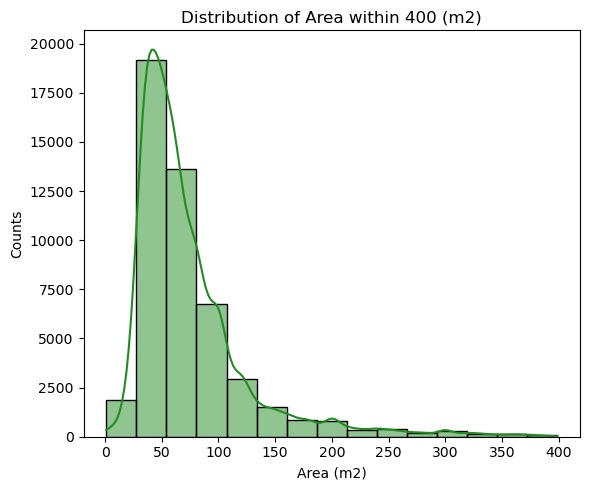

In [133]:
# Define lower and upper bound
lower_bound = 0
upper_bound = 400

# Filter the interval
df_area = org_hb[(org_hb["area_m2"] > lower_bound) & (org_hb["area_m2"] < upper_bound)]

fig, ax = plt.subplots(figsize=(6, 5))

sns.histplot(data = df_area, x = "area_m2", bins = 15, kde = True, color = "forestgreen", ax = ax)

ax.set_title("Distribution of Area within 400 (m2)")
ax.set_xlabel("Area (m2)")
ax.set_ylabel("Counts")

plt.tight_layout()
plot_all[f"area_dist_shallow"] = fig
plt.show()

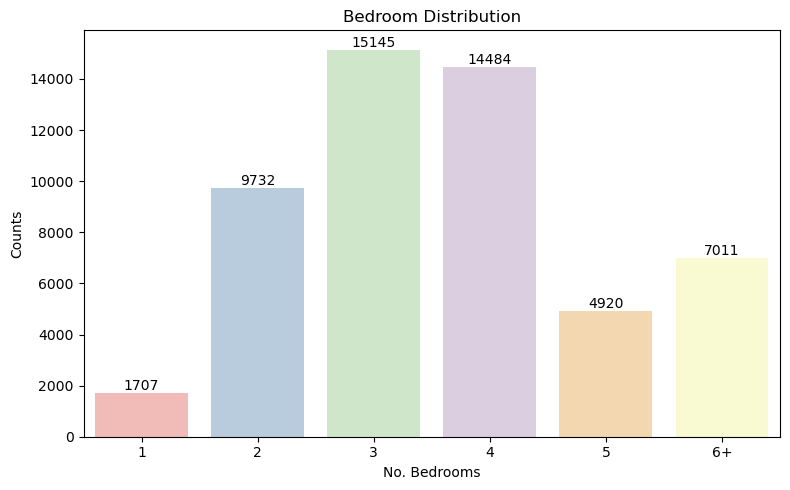

In [134]:
# Create bins
bins = [0, 1, 2, 3, 4, 5, 10]
labels = ["1", "2", "3", "4", "5", "6+"]

# Create a safe copy
df_bed = org_hb[org_hb["bedrooms"].notna()].copy()

df_bed["bedroom_bins"] = pd.cut(df_bed["bedrooms"], bins = bins, labels = labels, right = True)

# Visualisation
fig, ax = plt.subplots(figsize = (8, 5))

# Countplot
sns.countplot(data = df_bed, x = "bedroom_bins", palette = "Pastel1", ax = ax)

# Annotation
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

ax.set_title("Bedroom Distribution")
ax.set_xlabel("No. Bedrooms")
ax.set_ylabel("Counts")
plt.tight_layout()
plot_all[f"bed_dist_shallow"] = fig
plt.show()

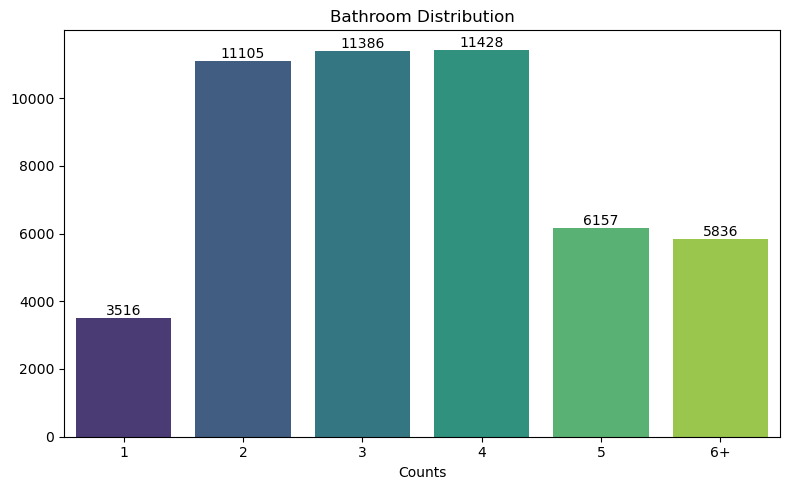

In [135]:
# Create bins
bins = [0, 1, 2, 3, 4, 5, 10]
labels = ["1", "2", "3", "4", "5", "6+"]

# Create a safe copy
df_bath = org_hb[org_hb["bathrooms"].notna()].copy()

df_bath["bathroom_bins"] = pd.cut(df_bath["bathrooms"], bins = bins, labels = labels, right = True)
# Count manually
bath_counts = df_bath["bathroom_bins"].value_counts().sort_index()

# Visualisation
fig, ax = plt.subplots(figsize = (8, 5))

sns.barplot(x = bath_counts.index, y = bath_counts.values, palette = "viridis", ax = ax)

# Annotation
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

ax.set_title("Bathroom Distribution")
ax.set_xlabel("No. Bathrooms")
ax.set_xlabel("Counts")
plt.tight_layout()
plot_all[f"bath_dist_shallow"] = fig
plt.show()

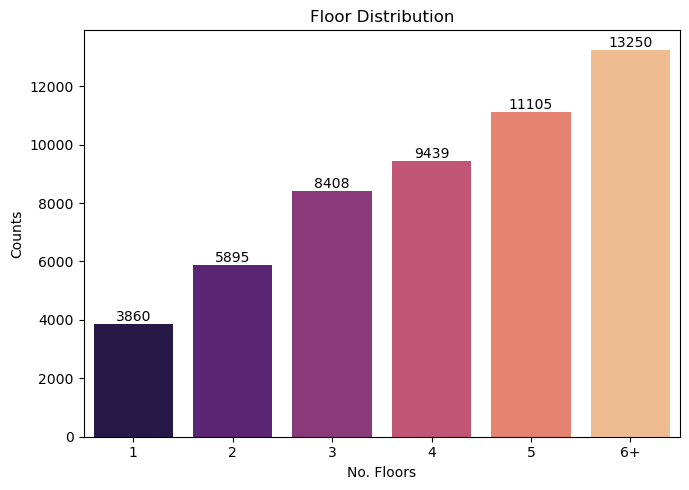

In [136]:
# Create bins
bins = [0, 1, 2, 3, 4, 5, 10]
labels = ["1", "2", "3", "4", "5", "6+"]

# Create a safe copy
df_floor = org_hb[org_hb["floors"].notna()].copy()

df_floor["floor_bins"] = pd.cut(df_floor["floors"], bins = bins, labels = labels, right = True)
# Count manually
floor_counts = df_floor["floor_bins"].value_counts().sort_index()

# Visualisation
fig, ax = plt.subplots(figsize = (7, 5))

sns.barplot(x = floor_counts.index, y = floor_counts.values, palette = "magma", ax = ax)

# Annotation
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(
        str(count),
        (p.get_x() + p.get_width() / 2, p.get_height()),
        ha="center",
        va="bottom",
        fontsize=10
    )

ax.set_title("Floor Distribution")
ax.set_xlabel("No. Floors")
ax.set_ylabel("Counts")
plt.tight_layout()
plot_all[f"floor_dist_shallow"] = fig
plt.show()

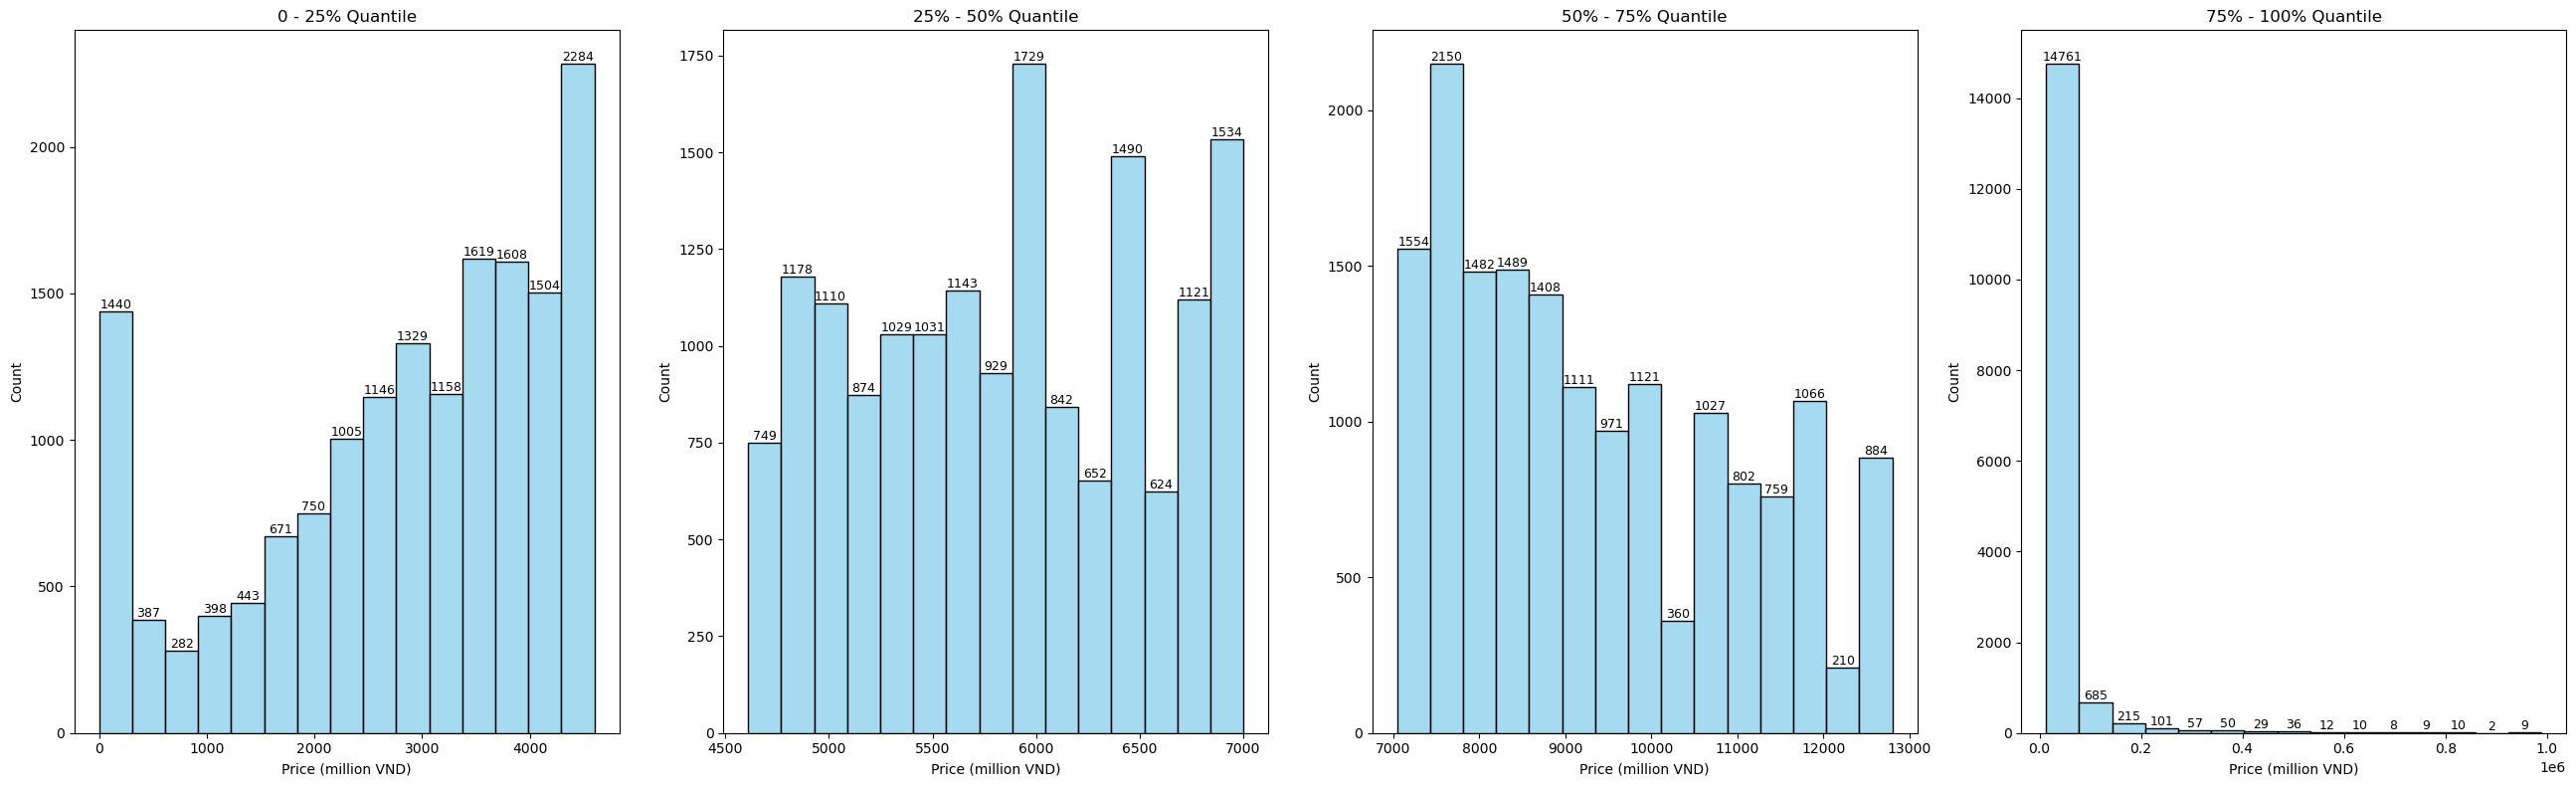

In [137]:
# Filter price
df_price = org_hb[(org_hb["price_million_vnd"].notna()) & (org_hb["price_million_vnd"] >= 0)].copy()

# Quantile values
q1, q2, q3 = df_price["price_million_vnd"].quantile([0.25, 0.5, 0.75])
max_price = df_price["price_million_vnd"].max()

# Define intervals
intervals = [(0, q1), (q1, q2), (q2, q3), (q3, max_price)]
titles = ["0 - 25% Quantile", "25% - 50% Quantile", "50% - 75% Quantile", "75% - 100% Quantile"]

# Visualisations
fig, axes = plt.subplots(1, 4, figsize = (26, 8))

for i, (low, high) in enumerate(intervals):
    plt.subplot(1, 4, i+1)
    subset = df_price[(df_price["price_million_vnd"] > low) & (df_price["price_million_vnd"] <= high)]
    
    # Draw histogram
    sns.histplot(subset["price_million_vnd"], bins=15, color="skyblue", kde=False, ax = axes[i])
    
    # Add annotations
    for p in axes[i].patches:
        count = int(p.get_height())
        axes[i].annotate(
            str(count),
            (p.get_x() + p.get_width() / 2, p.get_height()),
            ha="center",
            va="bottom",
            fontsize=9
        )
    
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Price (million VND)")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plot_all[f"price_dist_shallow"] = fig
plt.show()

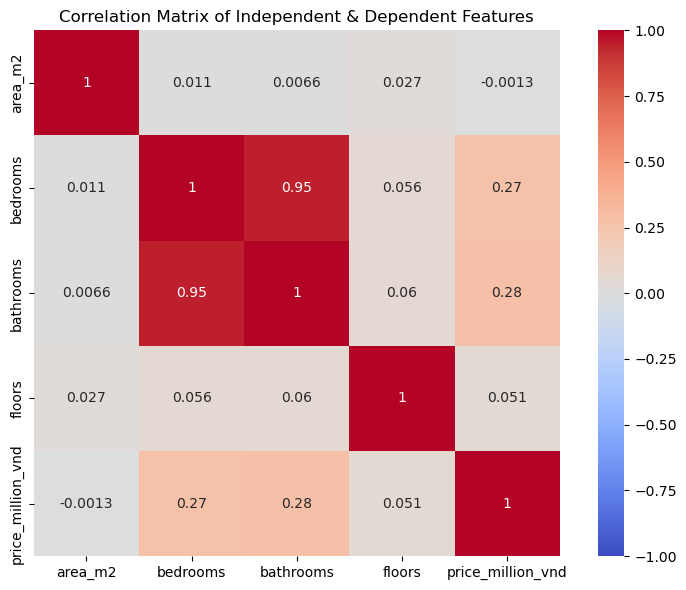

In [138]:
# Only select numerical features
numeric = org_hb.select_dtypes(include = ["number"]).drop(columns = ["id", "timeline_hours", "year", "day", "month"])

# Compute correlation matrix
corr_matrix = numeric.corr()

fig, ax = plt.subplots(figsize = (8, 6))
sns.heatmap(corr_matrix, annot = True, cmap = "coolwarm", vmin = -1, vmax = 1, square = True, ax = ax)
ax.set_title("Correlation Matrix of Independent & Dependent Features")
plt.tight_layout()
plot_all[f"corr_dist_shallow"] = fig
plt.show()

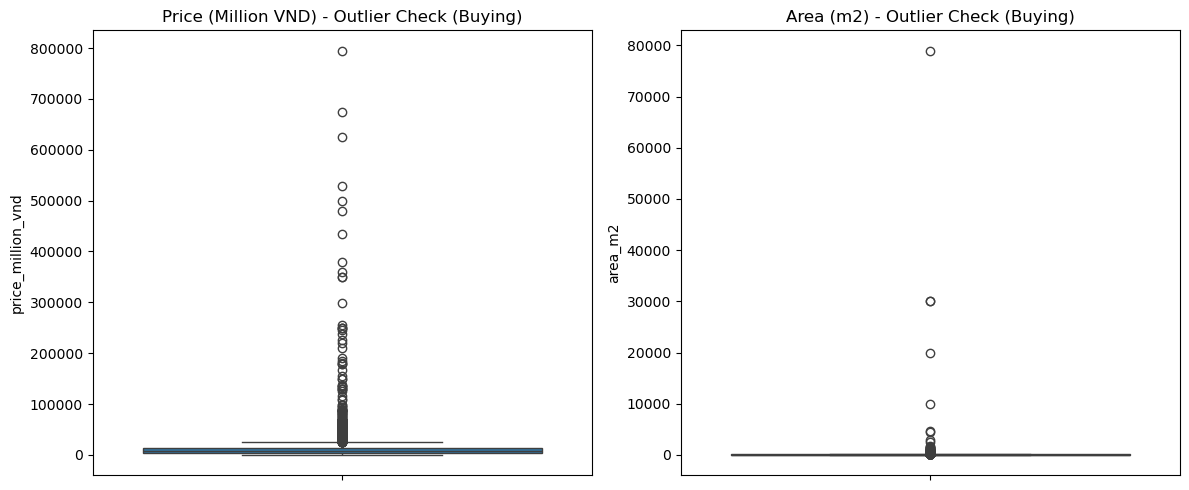

In [139]:
# Take 5% of the dataframe as sample
sample_df = org_hb.sample(frac = 0.05, random_state = 42)

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(y = sample_df["price_million_vnd"], ax = ax[0])
ax[0].set_title("Price (Million VND) - Outlier Check (Buying)")

sns.boxplot(y = sample_df["area_m2"], ax = ax[1])
ax[1].set_title("Area (m2) - Outlier Check (Buying)")

plt.tight_layout()
plot_all[f"ba_buying_dist_shallow"] = fig
plt.show()

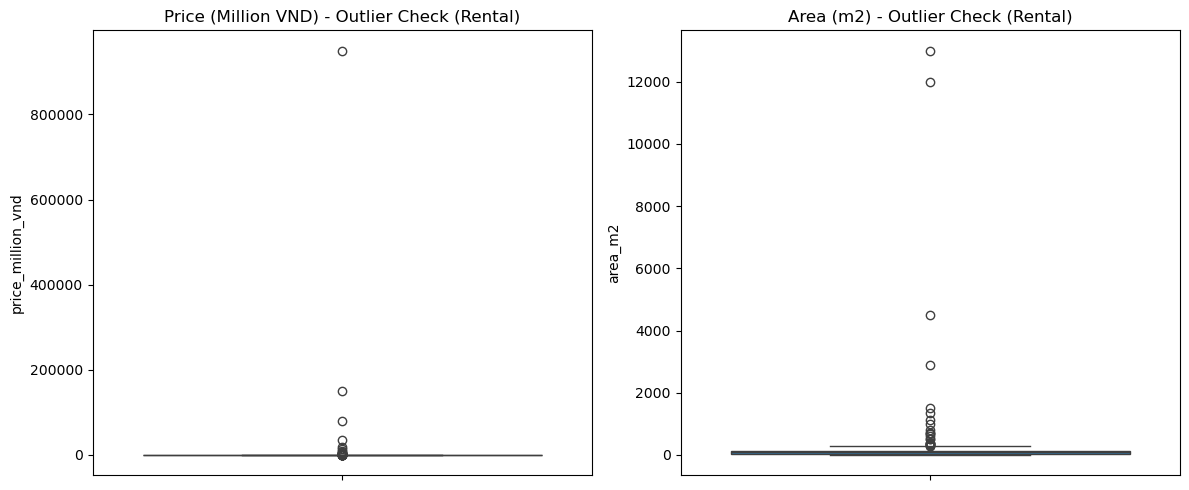

In [140]:
# Take 5% of the dataframe as sample
sample_df_2 = org_hr.sample(frac = 0.05, random_state = 42)

fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.boxplot(y = sample_df_2["price_million_vnd"], ax = ax[0])
ax[0].set_title("Price (Million VND) - Outlier Check (Rental)")

sns.boxplot(y = sample_df_2["area_m2"], ax = ax[1])
ax[1].set_title("Area (m2) - Outlier Check (Rental)")

plt.tight_layout()
plot_all[f"ba_rental_dist_shallow"] = fig
plt.show()

### 🧹 Feature Engineering & Data Cleaning 💨 ###

Prior to EDA section, those previously aggregated datasets were cleaned and engineered to ensure consistency and readiness. House prices were segmented into Low, Mid & High categories using interquartile thresholds. Province names were standardized and mapped to post-emergence administrative units to resolve geographic inconsistencies and observe the price fluctuation before and after emergence. Properly titles were preprocessed through normalization, Vietnamese tokenization, and stopword removal to support NLP analysis. The dataset was then filtered to representative provinces across major regions to reduce sparsity. Ultimately, multiple analysis-specific dataframes were created (price, location, size, timeline and text) to enable focused and efficient analysis.

#### 1. Price Segmentation ####

In [141]:
# Calculate quantile
q1 = org_hb["price_million_vnd"].quantile(0.25)
q3 = org_hb["price_million_vnd"].quantile(0.75)

def price_segment(price):
    if price <= q1:
        return "Low"
    elif q1 <= price <= q3:
        return "Mid"
    else:
        return "High"

org_hb["price_segment"] = org_hb["price_million_vnd"].apply(price_segment)

# Check distribution
print(org_hb["price_segment"].value_counts())

price_segment
Mid     32429
High    18097
Low     16386
Name: count, dtype: int64


#### 2. Province Lists ####

In [142]:
# Before emergence (Selective)
south_sample = ["Hồ Chí Minh", "Bình Dương", "Bà Rịa Vũng Tàu", "Đồng Nai", "Bình Phước", "Cần Thơ", "Sóc Trăng", "Hậu Giang"]
central_coast_sample = ["Đà Nẵng", "Huế", "Quảng Nam", "Bình Định", "Gia Lai"]
north_sample = ["Hà Nội", "Bắc Ninh", "Bắc Giang", "Hưng Yên", "Thái Bình", "Hải Phòng", "Hải Dương"]

# After emergence (Full)
province_mapping = {
    # North
    'Hà Nội' : ["Hà Nội"],
    'Tuyên Quang': ['Tuyên Quang', 'Hà Giang'],
    'Lai Châu' : ["Lai Châu"],
    'Điện Biên' : ["Điện Biên"],
    "Sơn La" : ["Sơn La"],
    "Lạng Sơn" : ["Lạng Sơn"],
    "Cao Bằng" : ["Cao Bằng"],
    "Quảng Ninh" : ["Quảng Ninh"],
    'Lào Cai': ['Lào Cai', 'Yên Bái'],
    'Thái Nguyên': ['Thái Nguyên', 'Bắc Kạn'],
    'Phú Thọ': ['Phú Thọ', 'Vĩnh Phúc', 'Hòa Bình'],
    'Bắc Ninh': ['Bắc Ninh', 'Bắc Giang'],
    'Hưng Yên': ['Hưng Yên', 'Thái Bình'],
    'Hải Phòng': ['Hải Phòng', 'Hải Dương'],
    'Ninh Bình': ['Ninh Bình', 'Hà Nam', 'Nam Định'],
    "Thanh Hoá" : ["Thanh Hoá"],

    # Central Coast
    "Nghệ An" : ["Nghệ An"],
    "Hà Tĩnh" : ["Hà Tĩnh"],
    'Huế' : ["Huế"],
    'Quảng Trị': ['Quảng Trị', 'Quảng Bình'],
    'Đà Nẵng': ['Đà Nẵng', 'Quảng Nam'],
    'Quảng Ngãi': ['Quảng Ngãi', 'Kon Tum'],
    'Gia Lai': ['Gia Lai', 'Bình Định'],
    'Đắk Lắk': ['Đắk Lắk', 'Phú Yên'],
    'Khánh Hòa': ['Khánh Hòa', 'Ninh Thuận'],
    'Lâm Đồng': ['Lâm Đồng', 'Đắk Nông', 'Bình Thuận'],

    # South
    'Đồng Nai': ['Đồng Nai', 'Bình Phước'],
    'Hồ Chí Minh': ['Hồ Chí Minh', 'Bà Rịa Vũng Tàu', 'Bình Dương'],
    'Tây Ninh': ['Tây Ninh', 'Long An'],
    'Đồng Tháp': ['Đồng Tháp', 'Tiên Giang'],
    'Vĩnh Long': ['Vĩnh Long', 'Bến Tre', 'Trà Vinh'],
    'Cần Thơ': ['Cần Thơ', 'Sóc Trăng', 'Hậu Giang'],
    'Cà Mau': ['Cà Mau', 'Bạc Liêu'],
    'An Giang': ['An Giang', 'Kiên Giang']
}

# Function to map between old and new
def map_old_new_provinces(province):
    # Safe check on unusual provinces
    if pd.isna(province):
        return "Other"

    prov = province.strip().lower()

    for new_province, old_list in province_mapping.items():
        for old_name in old_list:
            if prov == old_name.lower():  # Exact match
                return new_province
    return "Other"

# Apply mapping to create a new column
org_hb["province_after_emergence"] = org_hb["province"].apply(map_old_new_provinces)
org_hr["province_after_emergence"] = org_hr["province"].apply(map_old_new_provinces)

#### 3. Text Preprocessing Before Analysis ####

In [143]:
# Relative path
path = Path("../workarounds/preprocessing/nlp/vietnamese-stopwords-edited.txt")

# Load stopwords
with path.open(encoding = "utf-8") as f:
    stop_words = set(line.strip() for line in f if line.strip())

def preprocess_title(text):
    text = str(text).lower()
    text = re.sub(r'[^a-zA-ZÀ-ỹ\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()

    # Tokenize Vietnamese title
    tokens = word_tokenize(text, format = "text").split()

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    return " ".join(tokens)

# Apply to the dataframe
org_hb["cleaned_title"] = org_hb["title"].apply(preprocess_title)
org_hr["cleaned_title"] = org_hr["title"].apply(preprocess_title)

In [144]:
# Selective provinces on dataframes
org_hb_filtered = org_hb[org_hb["province"].isin(south_sample + central_coast_sample + north_sample)].copy()
org_hr_filtered = org_hr[org_hr["province"].isin(south_sample + central_coast_sample + north_sample)].copy()

#### 4. Feature Aggregation ####

In [145]:
# Location Dataframe
hb_location = org_hb_filtered[["id", "ward", "province", "area_m2", "price_million_vnd", "bedrooms", "bathrooms", "floors", "frontage"]]

# Price Analysis Dataframe
hb_price = org_hb_filtered[["id", "price_million_vnd", "area_m2", "bedrooms", "bathrooms", "floors", "frontage", "price_segment"]]

# House Size Dataframe
hb_size = org_hb_filtered[["id", "area_m2", "bedrooms", "bathrooms", "floors"]]

# Timeline Analysis Dataframe
hb_timeline = org_hb_filtered[["id", "day", "month", "year", "price_million_vnd", "ward", "province", "area_m2"]]

# NLP Text Analysis Dataframe
hb_text = org_hb_filtered[["id", "title", "cleaned_title"]]

In [146]:
# Location Dataframe
hr_location = org_hr_filtered[["id", "ward", "province", "area_m2", "price_million_vnd", "bedrooms", "bathrooms", "floors", "frontage"]]

# Price Analysis Dataframe
hr_price = org_hr_filtered[["id", "price_million_vnd", "area_m2", "bedrooms", "bathrooms", "floors", "frontage"]]

# House Size Dataframe
hr_size = org_hr_filtered[["id", "area_m2", "bedrooms", "bathrooms", "floors"]]

# Timeline Analysis Dataframe
hr_timeline = org_hr_filtered[["id", "day", "month", "year", "price_million_vnd", "ward", "province", "area_m2"]]

# NLP Text Analysis Dataframe
hr_text = org_hr_filtered[["id", "title", "cleaned_title"]]

### 📊 Exploratory Data Analysis (EDA) - Indepth Discussion 📉 ###

This Exploratory Data Analysis is designed to systematically investigate patterns, behaviours and structural differences within the buying and rental real estate datasets. The analysis is organized into three main tasks, each addressing a distinct analytical objective while remaining consistent in methodology and interpretation.

<b> Brief overview on task classification: </b> <br>

<i> 🛰️ Task 1: Lunar Shipwreck Of Predestined Whereabouts (Buying Market Analysis) </i> <br>

This task concentrates on understanding the property buying market. identifying key price drivers, spatial patterns, and structural attributes that influence purchasing decisions. <br>

Key Sections:
1. <b> Location-based Insights </b>
    - Price variation across provinces, districts / wards
    - Urban VS. Country-side market behaviour.
2. <b> Price Analysis </b>
   - Distribution, skewness, and outliers
   - Price segmentation and affordability ranges
3. <b> House Size & Layout Interpretation </b>
    - Area, bedrooms, bathrooms, and floors
    - Regular configurations for family-sized housing
4. <b> Timeline Insights (Time Series) </b>
    - Listing duration and posting trends
    - Market activity over time
5. <b> NLP Sentiment & Text Pattern Analysis </b>
    - Listing title characteristics
    - Signal patterns of urgency, promotion, or negotiation intention
6. <b> Pre-emergence vs. Post-emergence Comparison </b>
    - Structural and price differences before and after province emergence influence
    - Behavioural changes in listings and pricing patterns

<i> 🏴‍☠️ Task 2: Stock Rental Property Market – Sneaky Goblin’s Obsession Towards Treasures (Rental Market Analysis) </i> <br>

This task examines the rental housing market, emphasizing flexibility, pricing dynamics, and features aligned with short- to mid-term livings. <br>

Key Sections:
1. <b> Location-based Insights </b>
    - Rental concentration by region
    - Urban demand and accessibility effects
2. <b> Rental Price Structure </b>
    - Price dispersion and affordability tiers
    - Presence of budget vs. luxury rentals
3. <b> House Features & Layout Interpretation </b>
    - Area and room configurations
    - Suitability for individuals, families, or shared living
4. <b> Date / Listing Dynamics </b>
    - Listing upload frequency per month
    - Seasonal or cyclical rental behavior
5. <b> Mobility Demand Indicators </b>
    - Sentimental perception suggesting furnished status and compact layouts
    - The decision for shor-term or high mobility over time

<i> 🧭 Task 3: Mobility Over Long-term Residency? (Cross-market Comparison) </i><br>

This task combines together insights from both datasets to explore behavioral differences between buyers and renters, and conclude the mainstream tendency. <br>

<b>Focus Areas:</b>
- Structural and price contrasts between buying and rental markets
- Indicators of long-term settlement vs. mobility-oriented living
- Market segmentation implications for modeling and prediction

#### Task 1: Lunar Shipwreck Of Predestined Whereabouts ####

#### 1. Location-based Insights ####

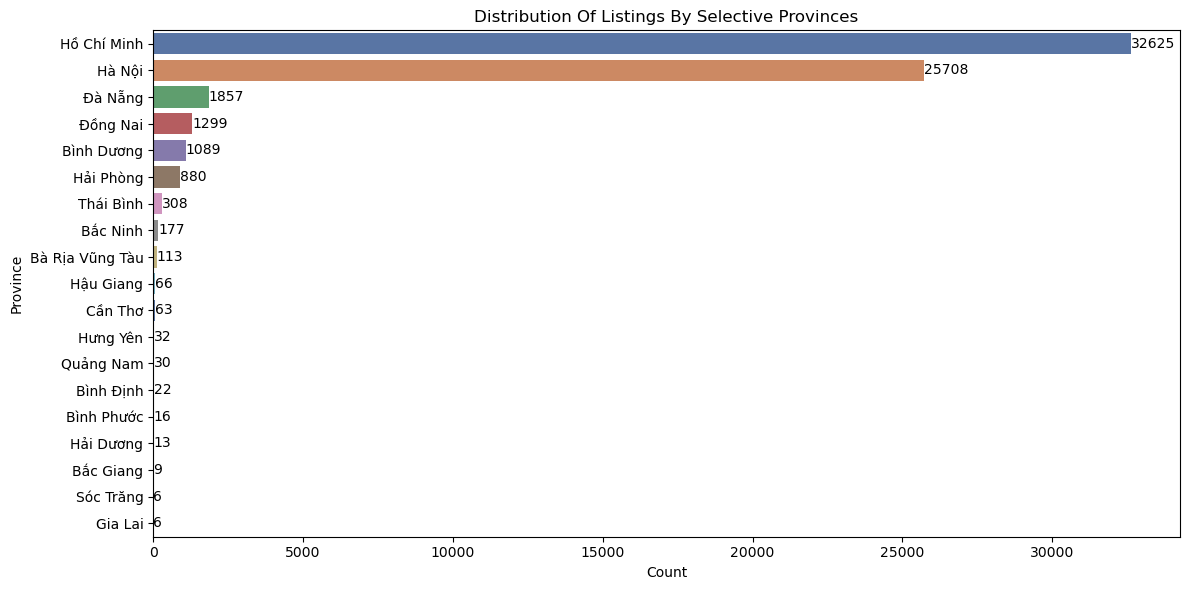

In [147]:
# Distribution of listings by Province and District / Ward
fig, ax = plt.subplots(figsize = (12, 6))

sns.countplot(data = hb_location, y = "province", order = hb_location["province"].value_counts().index, orient = "h", palette="deep", ax = ax)

ax.set_title("Distribution Of Listings By Selective Provinces")
ax.set_xlabel("Count")
ax.set_ylabel("Province")

# Add annotations
for p in ax.patches:
    count = int(p.get_width()) # bar length (count)
    y = p.get_y() + p.get_height() / 2 # vertical center of bar
    ax.text(p.get_width() + 0.5, y, count, va = "center") # slightly beyond bar end

plt.tight_layout()
plot_all[f"ba_rental_dist_t1"] = fig
plt.show()

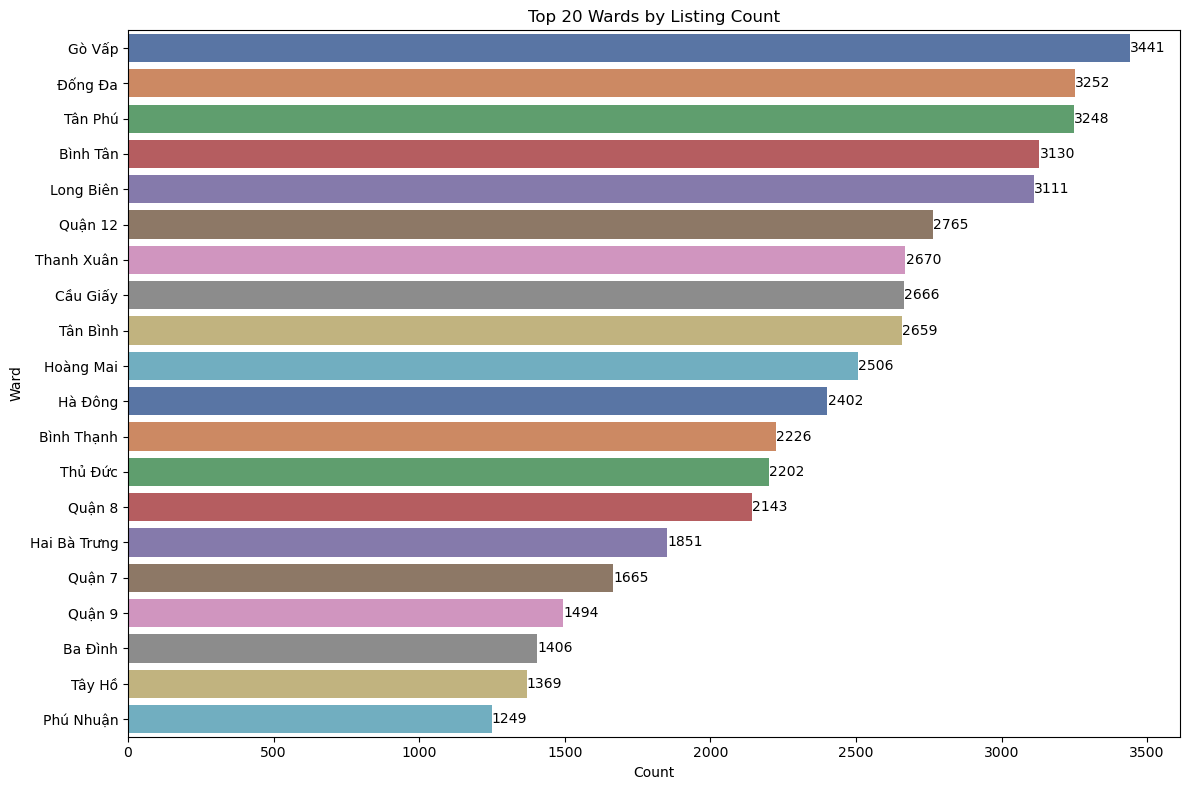

In [148]:
# Top 20 wards with highest distribution
fig, ax = plt.subplots(figsize = (12, 8))

sns.countplot(data = hb_location, y = "ward", order = hb_location["ward"].value_counts().head(20).index, palette="deep", ax = ax)

ax.set_title("Top 20 Wards by Listing Count")
ax.set_xlabel("Count")
ax.set_ylabel("Ward")

# Add annotations
for p in ax.patches:
    count = int(p.get_width()) # bar length (count)
    y = p.get_y() + p.get_height() / 2 # vertical center of bar
    ax.text(p.get_width() + 0.5, y, count, va = "center") # slightly beyond bar end

plt.tight_layout()
plot_all[f"top20_wards_t1"] = fig
plt.show()

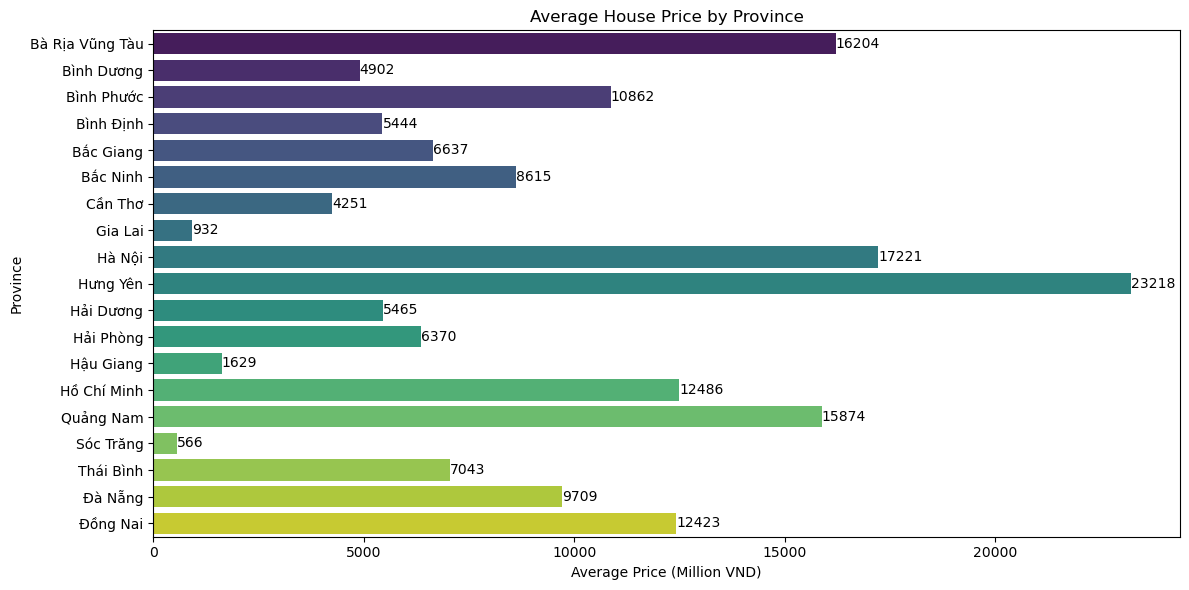

In [149]:
# Average price & area per location
location_summary = hb_location.groupby("province").agg(
    avg_price = ("price_million_vnd", "mean"),
    avg_area = ("area_m2", "mean"),
    count = ("id", "count")
).reset_index()

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(data=location_summary, x="avg_price", y="province", palette="viridis", ax = ax)

# Add annotations
for p in ax.patches:
    count = int(p.get_width()) # bar length (count)
    y = p.get_y() + p.get_height() / 2 # vertical center of bar
    ax.text(p.get_width() + 0.5, y, count, va = "center") # slightly beyond bar end

ax.set_title("Average House Price by Province")
ax.set_xlabel("Average Price (Million VND)")
ax.set_ylabel("Province")
plt.tight_layout()
plot_all[f"avg_hp_t1"] = fig
plt.show()

In [150]:
# Calculate average house price of each province (Min - Max)
avg_price_province = hb_location.groupby("province")["price_million_vnd"].agg(["min","max","mean","count"]).reset_index()
avg_price_province

province      min       max          mean  count
0   Bà Rịa Vũng Tàu     0.00  588000.0  16204.882692    104
1        Bình Dương     0.00  550000.0   4902.778618   1067
2        Bình Phước     1.00  130000.0  10862.562500     16
3         Bình Định     2.55   17500.0   5444.070455     22
4         Bắc Giang     0.00   22000.0   6637.500000      8
5          Bắc Ninh     6.00  135000.0   8615.742032    124
6           Cần Thơ     4.00   41000.0   4251.957627     59
7           Gia Lai   330.00    1580.0    932.500000      4
8            Hà Nội     0.00  989000.0  17221.510488  25136
9          Hưng Yên    34.00  180000.0  23218.733333     30
10        Hải Dương    50.00   28000.0   5465.384615     13
11        Hải Phòng     0.00   70000.0   6370.729915    824
12        Hậu Giang   600.00    5000.0   1629.818182     66
13      Hồ Chí Minh     0.00  930000.0  12486.349348  31564
14        Quảng Nam  1050.00   60000.0  15874.137931     29
15        Sóc Trăng    50.00    1600.0    566.666667      3
16        Thái Bình     0.00   67000.0   7043.736645    307
17          Đà Nẵng     0.00  675000.0   9709.712843   1794
18         Đồng Nai     0.00  950000.0  12423.492940   1211

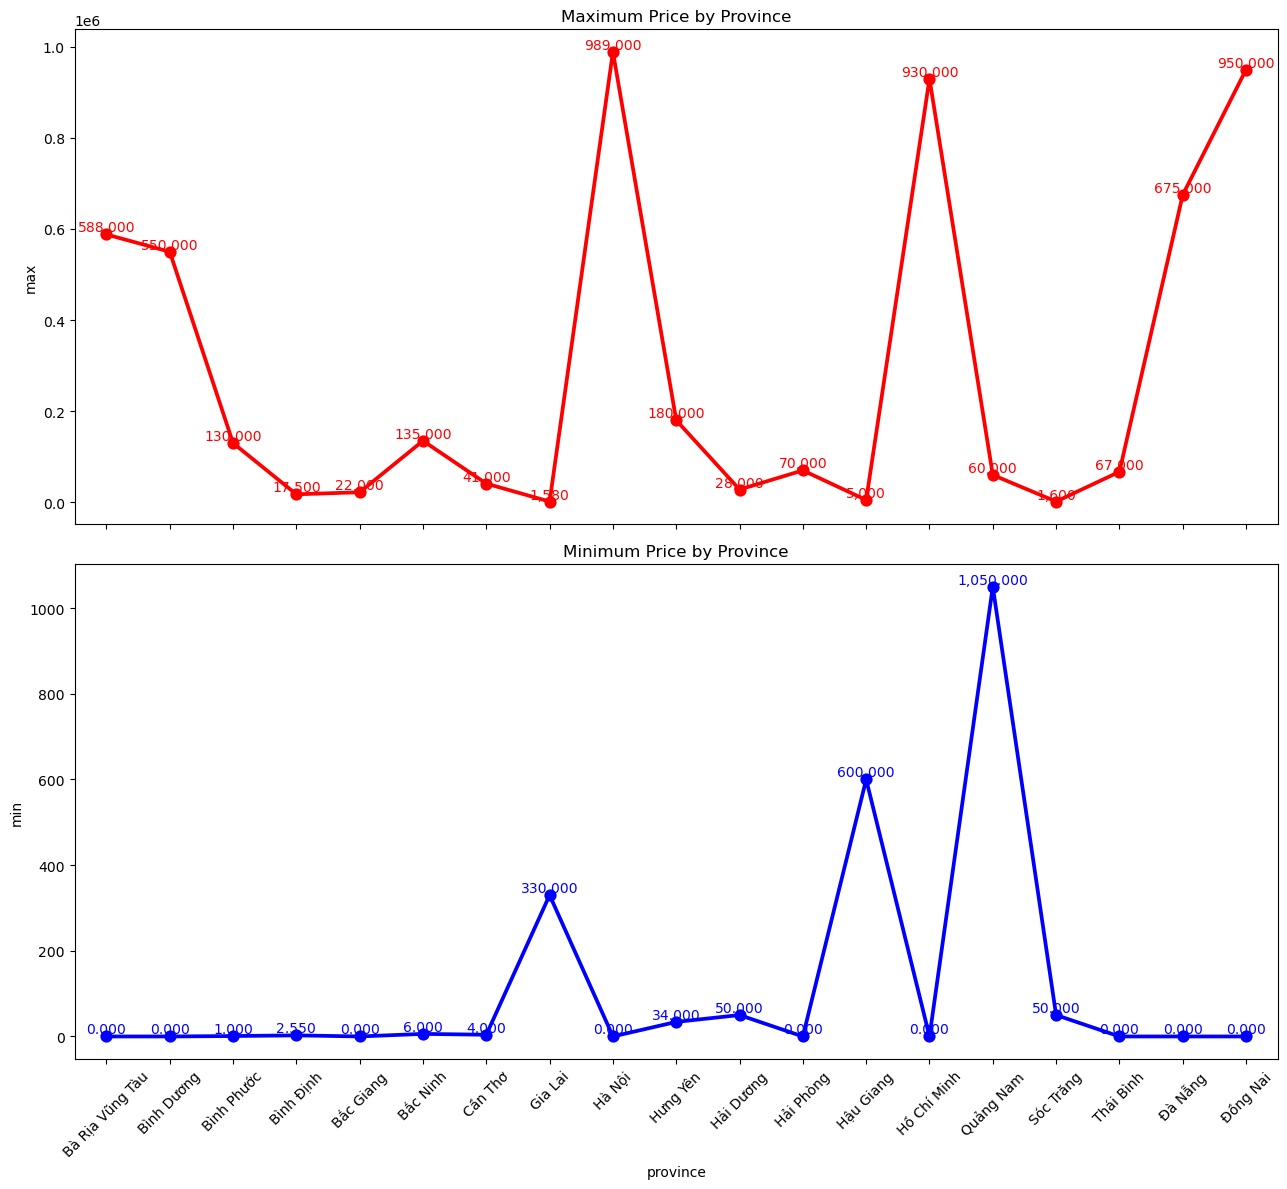

In [151]:
fig, ax = plt.subplots(2,1, figsize=(13,12), sharex=True)

# Maximum Price
sns.pointplot(data=avg_price_province, x="province", y="max", color="red", ax=ax[0])
ax[0].set_title("Maximum Price by Province")

# Add annotation for max values
for i, value in enumerate(avg_price_province["max"]):
    ax[0].text(
        i, value,                      # x, y
        f"{value:,.0f}",               # formatted number
        ha='center', va='bottom',
        fontsize=10, color='red'
    )

# Minimum Price
sns.pointplot(data=avg_price_province, x="province", y="min", color="blue", ax=ax[1])
ax[1].set_title("Minimum Price by Province")

# Add annotation for min values
for i, value in enumerate(avg_price_province["min"]):
    ax[1].text(
        i, value,
        f"{value:,.3f}",
        ha='center', va='bottom',
        fontsize=10, color='blue'
    )
plt.xticks(rotation=45)
plt.tight_layout()
plot_all[f"max_min_price_t1"] = fig
plt.show()

#### 2. Price Analysis ####

In [152]:
price_prepipeline = PreprocessingPipeline([
    IQRMethod(columns = ["price_million_vnd"])
])

hb_price_filtered = price_prepipeline.fit_transform(hb_price)

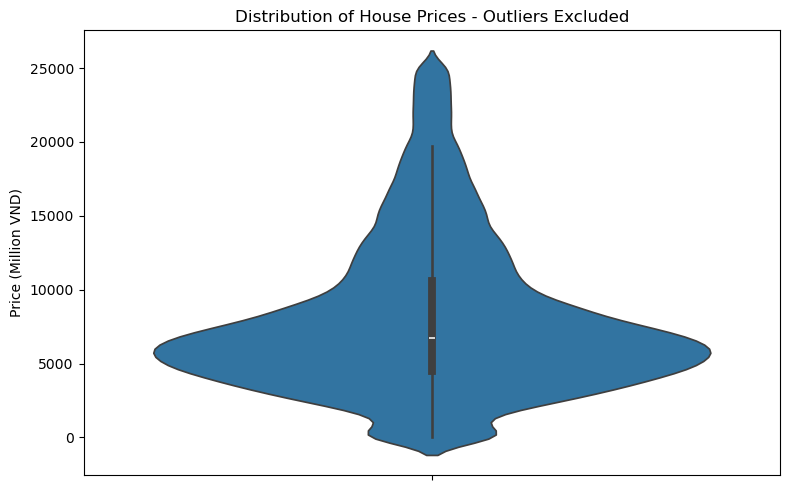

In [153]:
# Distribution of house prices (Overall)
fig, ax = plt.subplots(figsize = (8, 5))

sns.violinplot(data = hb_price_filtered, y = "price_million_vnd", ax = ax)

ax.set_title("Distribution of House Prices - Outliers Excluded")
ax.set_ylabel("Price (Million VND)")
plt.tight_layout()
plot_all[f"hp_price_dist_t1"] = fig
plt.show()

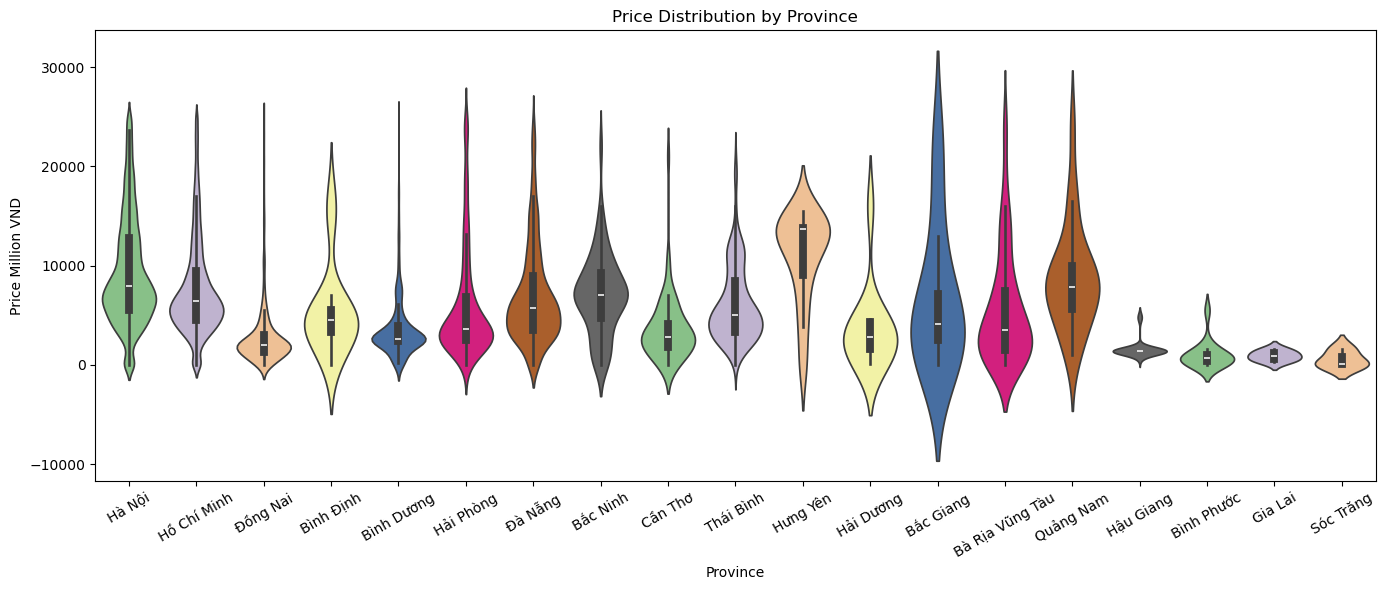

In [154]:
fig, ax = plt.subplots(figsize = (14, 6))

sns.violinplot(data=hb_price_filtered.merge(hb_location[["id","province"]], on="id"), x="province", y="price_million_vnd", palette = "Accent", ax = ax)

ax.set_ylabel("Price Million VND")
ax.set_xlabel("Province")
ax.set_title("Price Distribution by Province")

plt.xticks(rotation=30)
plt.tight_layout()
plot_all[f"price_dist_prov_t1"] = fig
plt.show()

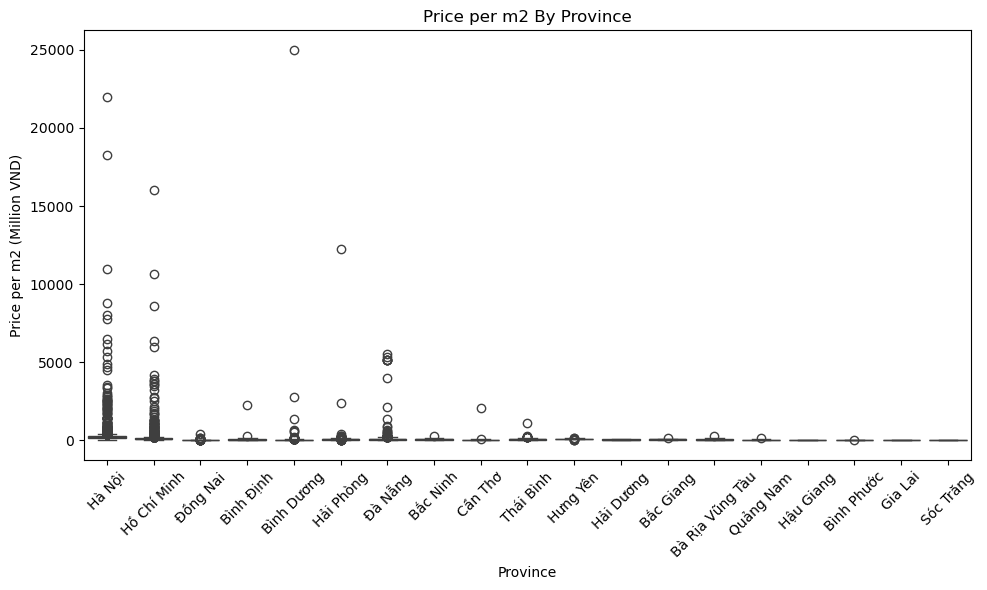

In [155]:
# Price per square meter
hb_price_filtered["price_per_m2"] = hb_price_filtered["price_million_vnd"] / hb_price_filtered["area_m2"]

fig, ax = plt.subplots(figsize = (10, 6))
sns.boxplot(data = hb_price_filtered.merge(hb_location[["id", "province"]], on = "id"), x = "province", y = "price_per_m2", ax = ax)

ax.set_xlabel("Province")
ax.set_ylabel("Price per m2 (Million VND)")
plt.xticks(rotation = 45)
ax.set_title("Price per m2 By Province")
plt.tight_layout()
plot_all[f"ppm2_prov_t1"] = fig
plt.show()

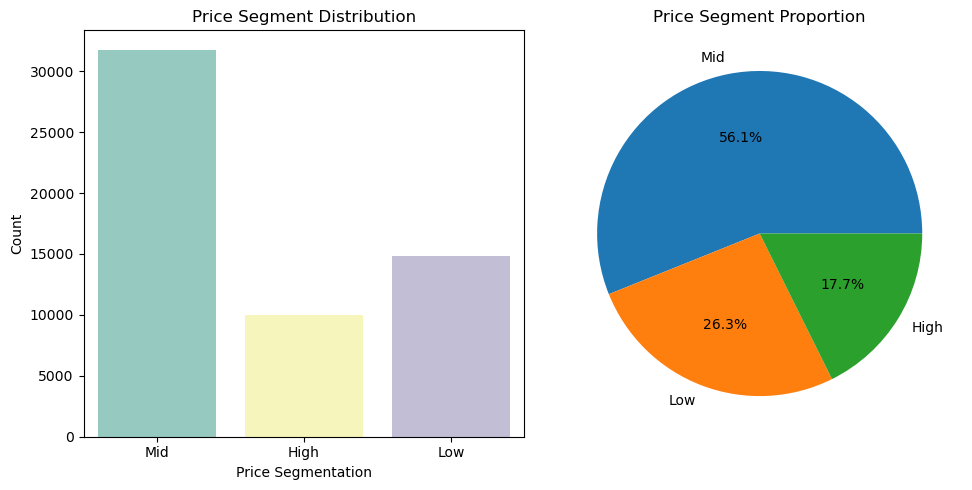

In [156]:
# Price Segmentation
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

# Countplot
sns.countplot(data = hb_price_filtered, x = "price_segment", ax = axes[0], palette = "Set3")

axes[0].set_xlabel("Price Segmentation")
axes[0].set_ylabel("Count")
axes[0].set_title("Price Segment Distribution")
axes[0].tick_params(axis='x')

# Pie chart
filtered["price_segment"].value_counts().plot(kind = "pie", autopct = "%1.1f%%", ax = axes[1])
axes[1].set_title("Price Segment Proportion")
axes[1].set_ylabel("")

plt.tight_layout()
plot_all[f"ps_t1"] = fig
plt.show()

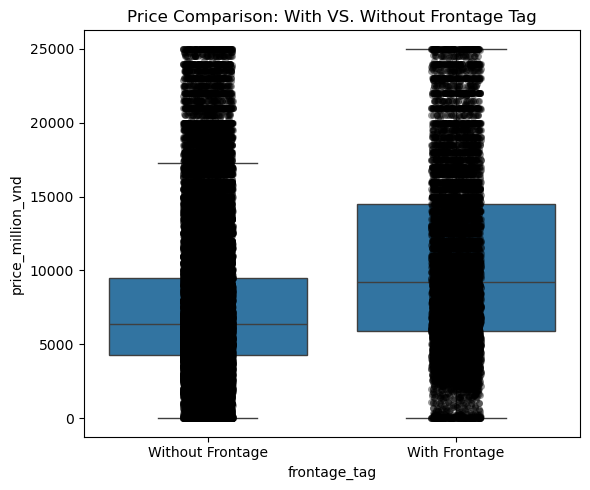

In [157]:
# Convert from boolean to numeric features
hb_price_filtered["frontage_tag"] = hb_price_filtered["frontage"].astype(bool).astype(int)

# Frontage Tag Influence
fig, ax = plt.subplots(figsize=(6, 5))

sns.boxplot(data=hb_price_filtered, x="frontage_tag", y="price_million_vnd", showfliers=False, ax = ax)
sns.stripplot(data=hb_price_filtered, x="frontage_tag", y="price_million_vnd", color='black', alpha=0.4, jitter=True, ax = ax)

plt.xticks([0,1], ["Without Frontage", "With Frontage"])
ax.set_title("Price Comparison: With VS. Without Frontage Tag")
plt.tight_layout()
plot_all[f"frontage_comp_t1"] = fig
plt.show()

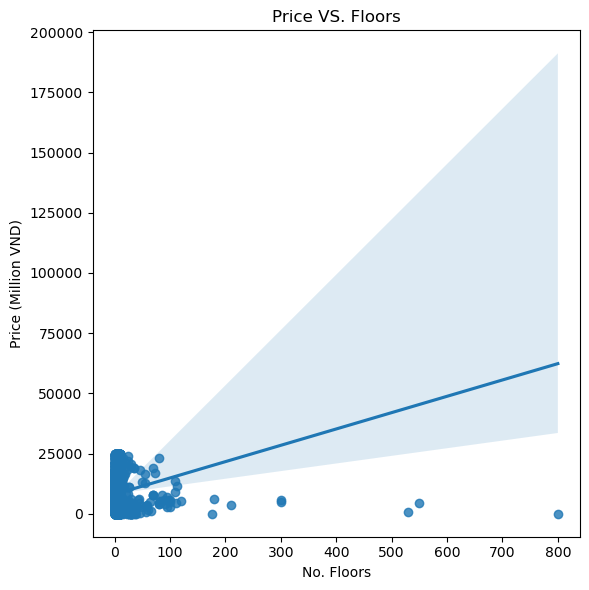

In [158]:
# Price VS. Floors
fig, ax = plt.subplots(figsize = (6, 6))
sns.regplot(data = hb_price_filtered, x = "floors", y = "price_million_vnd", ax = ax)

ax.set_xlabel("No. Floors")
ax.set_ylabel("Price (Million VND)")
ax.set_title("Price VS. Floors")
plt.tight_layout()
plot_all[f"price_floor_t1"] = fig
plt.show()

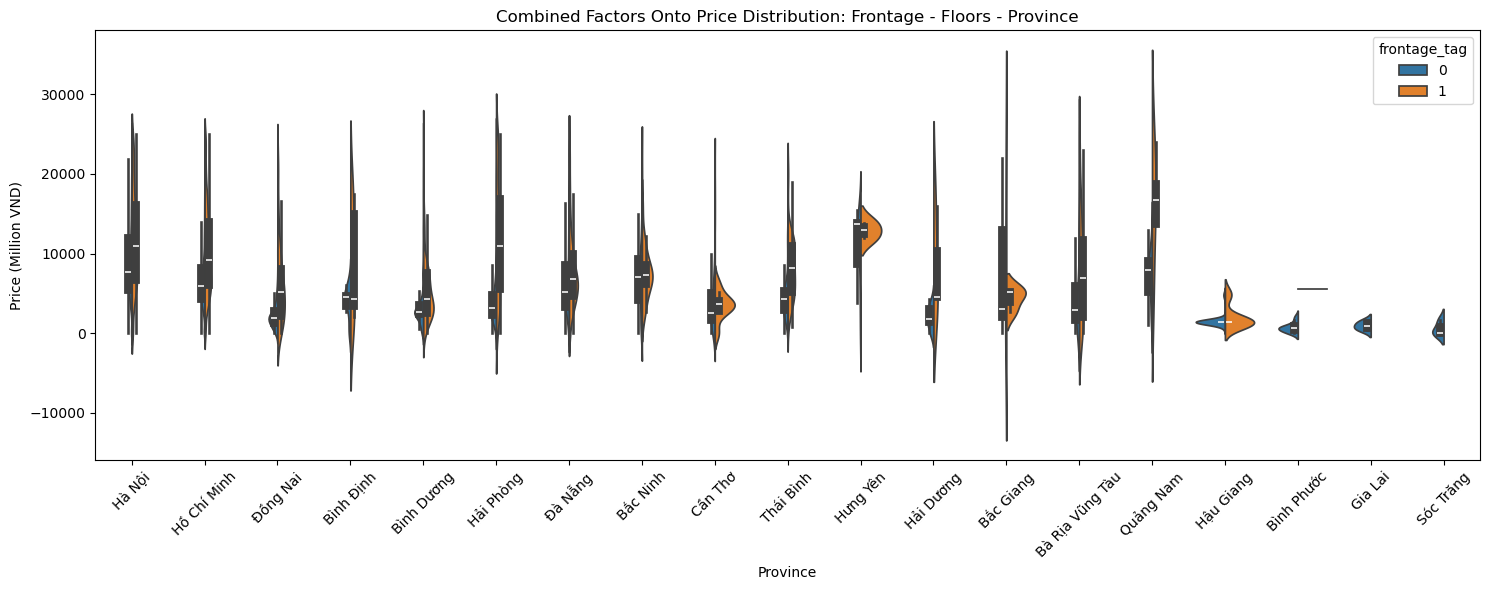

In [159]:
# Multiple aspects into price difference
temp = hb_price_filtered.merge(hb_location[["id", "province"]], on = "id")

fig, ax = plt.subplots(figsize = (15, 6))

sns.violinplot(data = temp, x = "province", y = "price_million_vnd", hue = "frontage_tag", split = True, ax = ax)

ax.set_xlabel("Province")
ax.set_ylabel("Price (Million VND)")
ax.set_title("Combined Factors Onto Price Distribution: Frontage - Floors - Province")
plt.xticks(rotation = 45)
plt.tight_layout()
plot_all[f"frontage_floors_province_t1"] = fig
plt.show()

#### 3. House Size & Layout Interpretation ####

In [160]:
size_prepipeline = PreprocessingPipeline([
    IQRMethod(columns = ["area_m2"])
])

hb_size_filtered = size_prepipeline.fit_transform(hb_size)

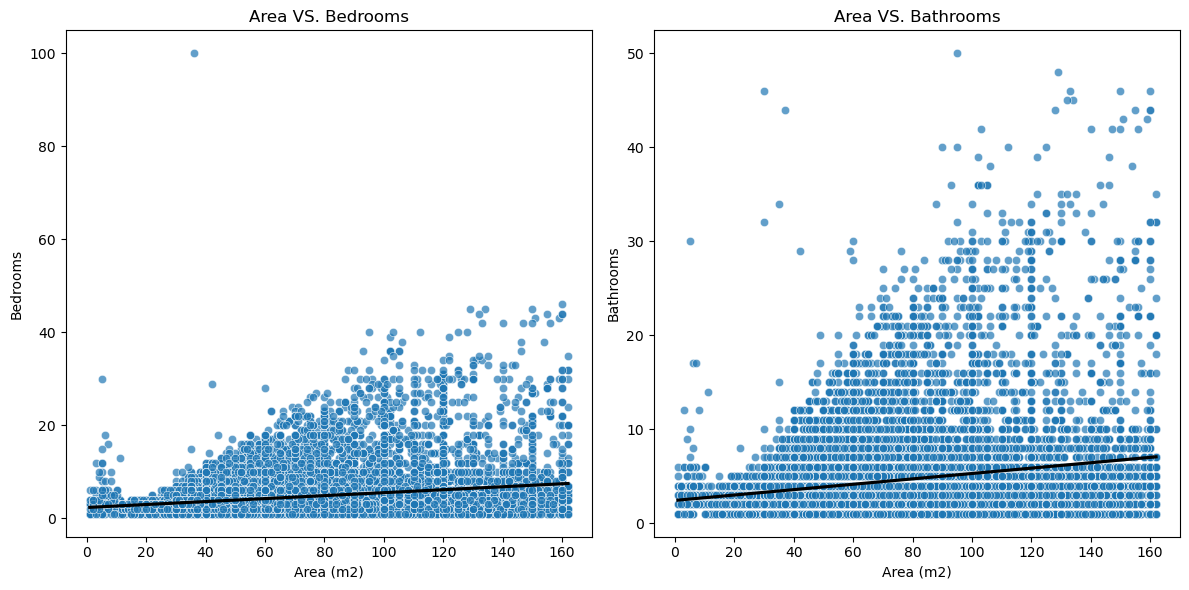

In [161]:
# Relationship between areas and bedrooms / bathrooms

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Area VS. Bedrooms
sns.scatterplot(data = hb_size_filtered, x = "area_m2", y = "bedrooms", palette = "Set1", alpha = 0.7, ax = axes[0])
sns.regplot(data = hb_size_filtered, x = "area_m2", y = "bedrooms", scatter = False, ax = axes[0], color = "black")
axes[0].set_xlabel("Area (m2)")
axes[0].set_ylabel("Bedrooms")
axes[0].set_title("Area VS. Bedrooms")

# Area VS. Bathrooms
sns.scatterplot(data = hb_size_filtered, x = "area_m2", y = "bathrooms", palette = "Set1", alpha = 0.7, ax = axes[1])
sns.regplot(data = hb_size_filtered, x = "area_m2", y = "bathrooms", scatter = False, ax = axes[1], color = "black")
axes[1].set_xlabel("Area (m2)")
axes[1].set_ylabel("Bathrooms")
axes[1].set_title("Area VS. Bathrooms")

plt.tight_layout()
plot_all[f"area_bed_bath_t1"] = fig
plt.show()

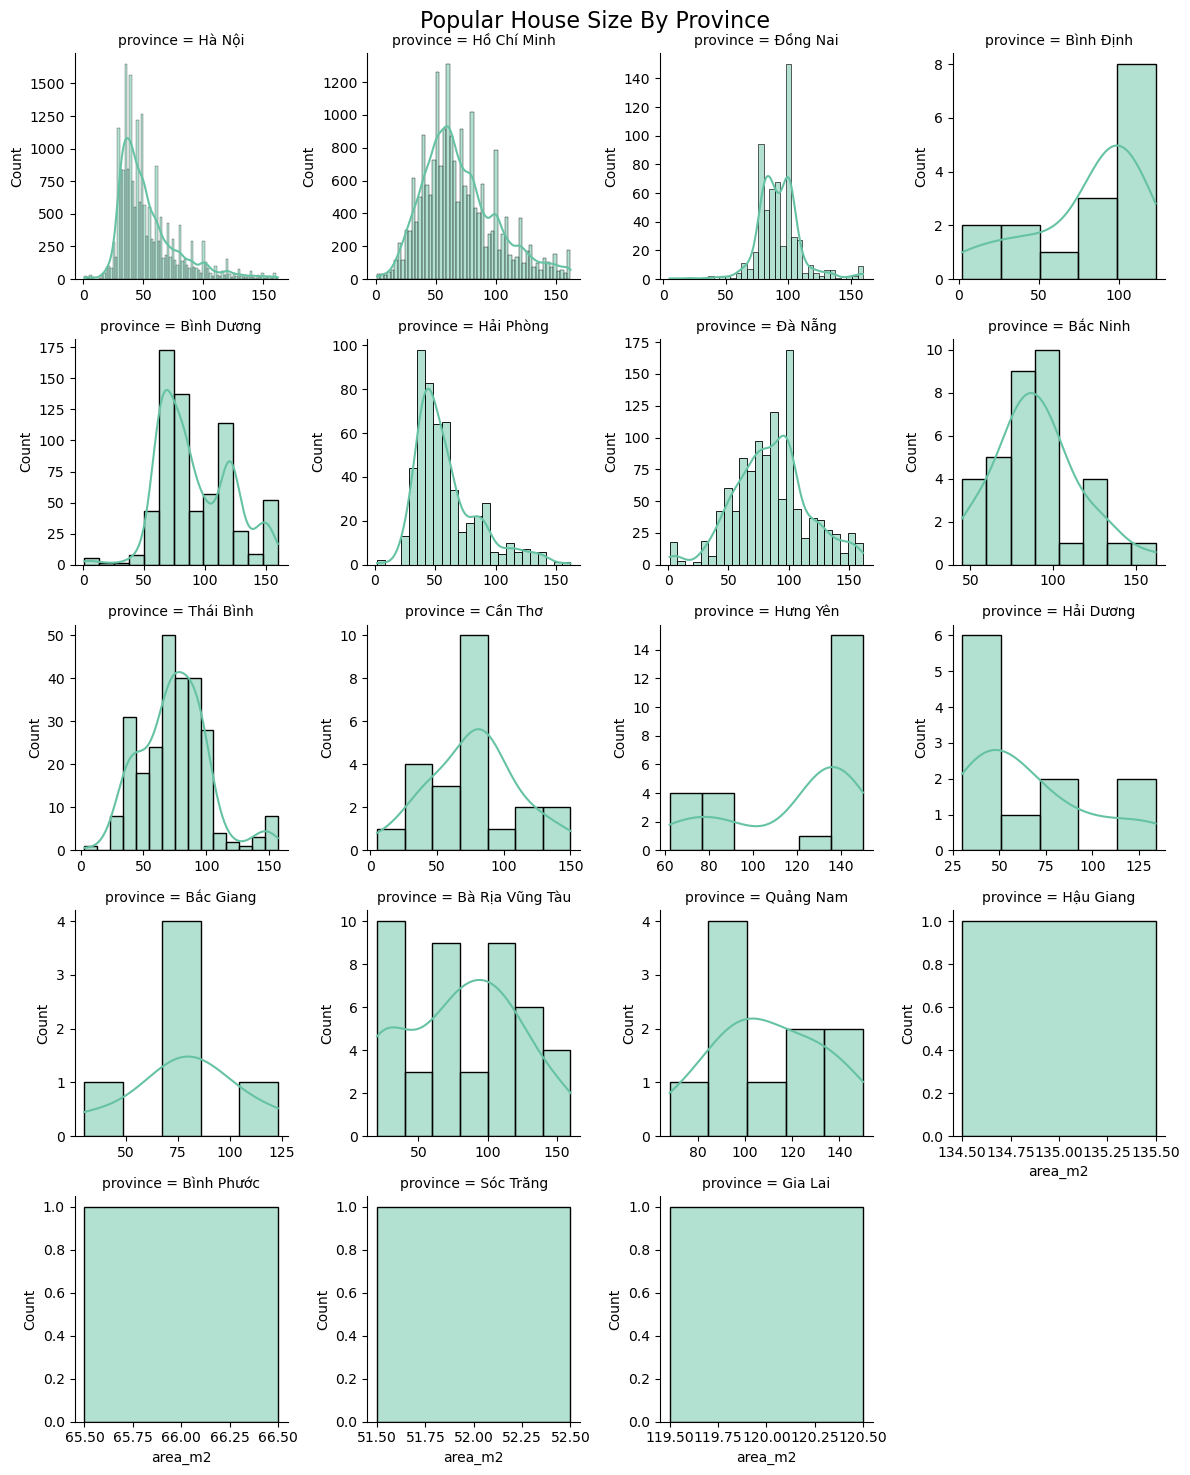

In [162]:
temp = hb_size_filtered.merge(hb_location[["id", "province"]], on = "id")

g = sns.FacetGrid(temp, col = "province", col_wrap = 4, sharex = False, sharey = False)
g.map(sns.histplot, "area_m2", kde = True, color=sns.color_palette("Set2")[0])

g.fig.suptitle("Popular House Size By Province", fontsize = 16)
g.fig.subplots_adjust(top = 0.9) # adjust top to make room for title

g.tight_layout()

plot_all[f"province_size_t1"] = g.fig
g.fig.show()

#### 4. Timeline Insights (Time Series) ####

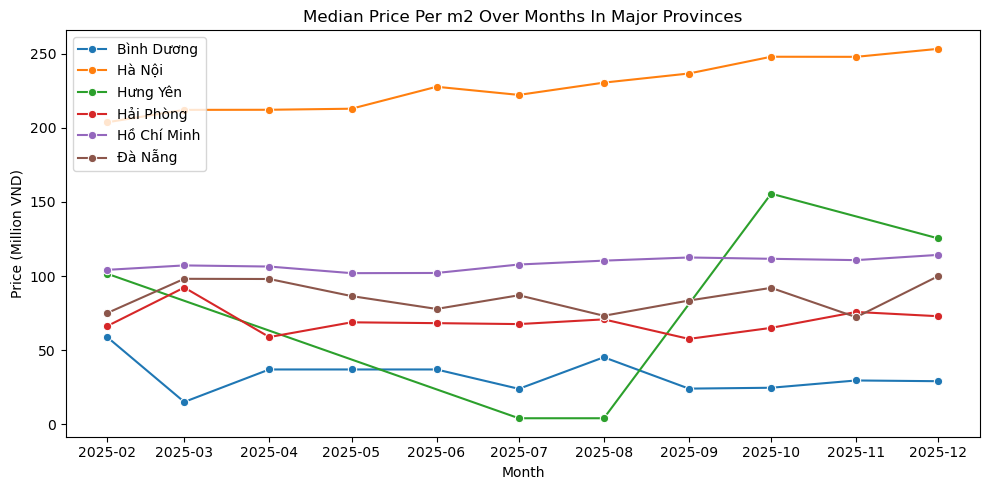

In [163]:
# Reaggregate into date format
hb_timeline["date"] = pd.to_datetime(dict(year=hb_timeline.year, month=hb_timeline.month, day=hb_timeline.day))

# Compute price per m2
hb_timeline["price_per_m2"] = hb_timeline["price_million_vnd"] / hb_timeline["area_m2"]

# Filter for major provinces
hb_filtered = hb_timeline[hb_timeline["province"].isin(["Hà Nội", "Hồ Chí Minh", "Đà Nẵng", "Hải Phòng", "Bình Dương", "Hưng Yên"])]

# Aggregate median price per month in 2025
hb_filtered = hb_filtered[hb_filtered["year"] == 2025]
hb_filtered["month"] = hb_filtered["date"].dt.to_period("M").dt.to_timestamp()

monthly_trend = hb_filtered.groupby(["province", "month"]).agg(median_price_m2 = ("price_per_m2", "median")).reset_index()

# Plot
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(data = monthly_trend, x = "month", y = "median_price_m2", hue = "province", marker = "o", ax = ax)

ax.set_title("Median Price Per m2 Over Months In Major Provinces")
ax.set_ylabel("Price (Million VND)")
ax.set_xlabel("Month")
plt.legend(loc='upper left')
plt.tight_layout()
plot_all[f"med_ppm2_t1"] = fig
plt.show()

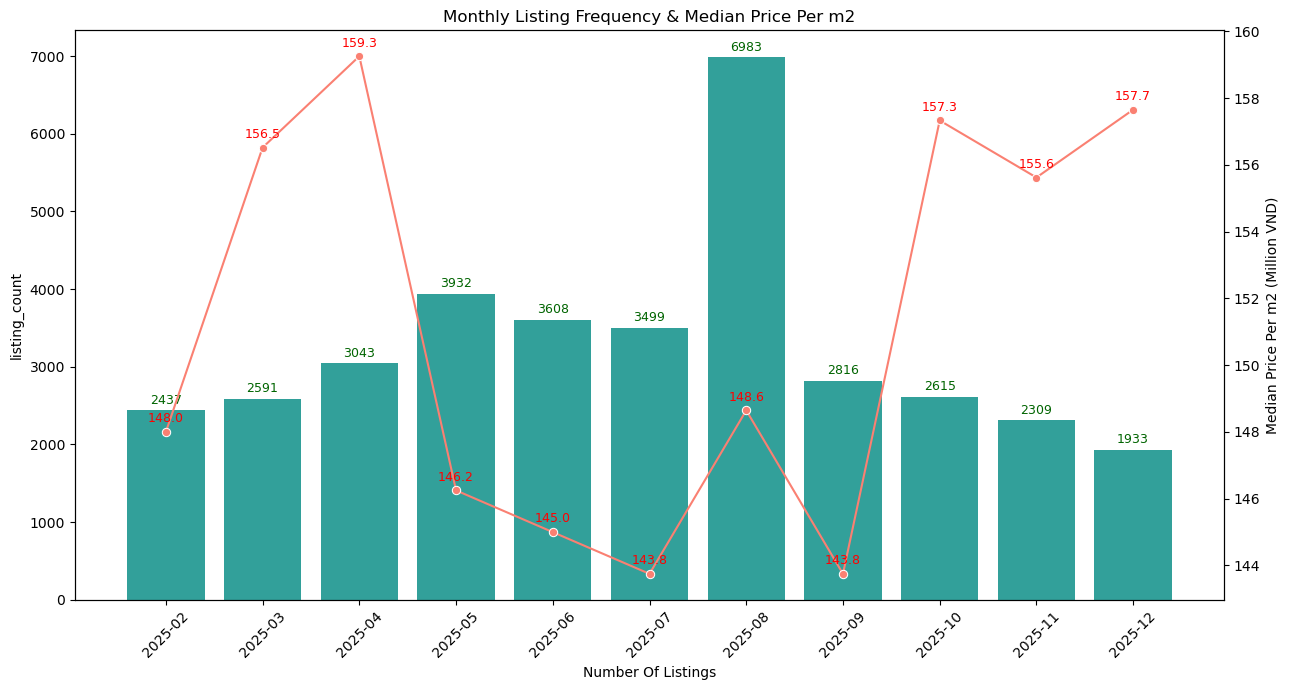

In [164]:
# Restrict to 2025
hb_2025 = hb_timeline[hb_timeline["year"] == 2025].copy()
hb_2025 = hb_2025[hb_2025["province"].isin(["Hà Nội", "Hồ Chí Minh", "Đà Nẵng", "Hải Phòng", "Bình Dương", "Hưng Yên"])]

# Monthly Listing Frequency & Pricing
monthly_line = hb_2025.groupby([hb_2025["date"].dt.to_period("M")]).agg(
    listing_count = ("id", "count"),
    median_price_m2 = ("price_per_m2", "median")
).reset_index()

# Convert month_str to string for barplot
monthly_line["month_str"] = monthly_line["date"].dt.to_timestamp().dt.strftime("%Y-%m")

# Plot listing count & median price per m2
fig, ax1 = plt.subplots(figsize = (13, 7))

sns.barplot(data = monthly_line, x = "month_str", y = "listing_count", color = "lightseagreen", ax = ax1)
ax1.set_xlabel("Number Of Listings")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation = 45)

# Annotate bars
for i, row in monthly_line.iterrows():
    ax1.text(i, row["listing_count"] + 50, f'{row["listing_count"]}', ha='center', va='bottom', fontsize=9, color='darkgreen')

ax2 = ax1.twinx()
sns.lineplot(data = monthly_line, x = "month_str", y = "median_price_m2", color = "salmon", marker="o", ax=ax2)
ax2.set_ylabel("Median Price Per m2 (Million VND)")

# Annotate line points
for i, row in monthly_line.iterrows():
    ax2.text(i, row["median_price_m2"] + 0.2, f'{row["median_price_m2"]:.1f}', ha='center', va='bottom', fontsize=9, color='red')

plt.title("Monthly Listing Frequency & Median Price Per m2")
plt.tight_layout()
plot_all[f"monthly_med_ppm2_t1"] = fig
plt.show()

#### 5. NLP Sentiment & Text Pattern Analysis ####

In [165]:
# Tokenize using underthesea (Vietnamese NLP)
def tokenize_vietnamese(text):
    if pd.isna(text):
        return []

    # returns a string with spaces between tokens
    tokens = word_tokenize(text.lower(), format = "text").split()
    return tokens

# Apply tokenization
hb_text["tokens"] = hb_text["cleaned_title"].apply(tokenize_vietnamese)

# Flatten all tokens into a single list
all_tokens = [token for tokens in hb_text['tokens'] for token in tokens]

In [166]:
# Word Frequency Analysis
word_freq = Counter(all_tokens).most_common(50)
print("Top 20 Keywords: ", word_freq[:20])
print("Top 20 Lesser-known Keywords: ", word_freq[-20:])

Top 20 Keywords:  [('m', 56068), ('nhà', 47326), ('bán', 35967), ('tỷ', 34959), ('tầng', 25750), ('giá', 16707), ('x', 12861), ('mặt_tiền', 10222), ('đường', 8892), ('ô_tô', 8402), ('đẹp', 8209), ('hẻm', 8106), ('gần', 7123), ('phố', 6357), ('kinh_doanh', 5888), ('lô', 5760), ('nhỉnh', 5406), ('mt', 4805), ('dt', 4624), ('t', 4454)]
Top 20 Lesser-known Keywords:  [('tiền', 3020), ('mặt_phố', 2966), ('khu', 2912), ('ngang', 2896), ('mặt', 2810), ('p', 2801), ('phường', 2764), ('tr', 2617), ('gò', 2521), ('xây', 2483), ('full', 2416), ('trung_tâm', 2409), ('nội_thất', 2324), ('cửa', 2316), ('vấp', 2259), ('thoáng', 2096), ('đông', 2038), ('chợ', 2028), ('hồ', 2005), ('tl', 1940)]


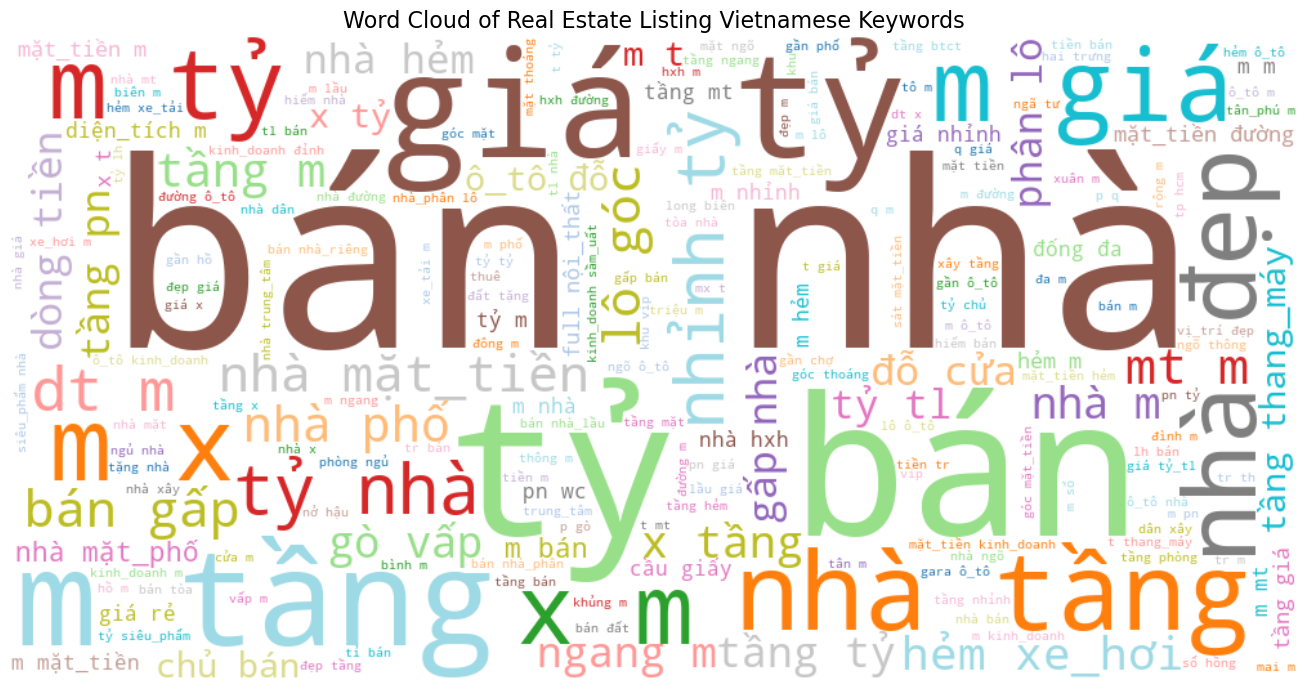

In [167]:
# Word Cloud
wordcloud = WordCloud(width = 1000, height = 500, background_color = "white", colormap = "tab20").generate(" ".join(all_tokens))

fig, ax = plt.subplots(figsize = (15, 7))
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
ax.set_title("Word Cloud of Real Estate Listing Vietnamese Keywords", fontsize = 16)
plt.tight_layout()
plot_all[f"wc_t1"] = fig
plt.show()

In [168]:
# Phrase Analysis (Bigrams)

# pairs of consecutive words (2, 2), only keep the most 50 frequent bigrams
vectorizer = CountVectorizer(ngram_range=(2,2), max_features=50)

# Learn the vocabulary of bigrams and transform the text into a sparse matrix of counts (transform)
X = vectorizer.fit_transform(hb_text['cleaned_title'].dropna())

# a list of tuples: ("bigram", count).
ngram_freq = zip(vectorizer.get_feature_names_out(), X.sum(axis=0).tolist()[0])

# Sorts the bigrams by frequency in descending order 
ngram_freq = sorted(ngram_freq, key=lambda x: x[1], reverse=True)

print("Top 20 bigrams:", ngram_freq[:20])

Top 20 bigrams: [('bán nhà', 24446), ('giá tỷ', 10336), ('nhà tầng', 6357), ('nhà đẹp', 4867), ('nhỉnh tỷ', 4435), ('nhà mặt_tiền', 3426), ('lô góc', 3135), ('bán gấp', 2993), ('nhà phố', 2749), ('hẻm xe_hơi', 2644), ('tầng tỷ', 2533), ('gò vấp', 2151), ('tầng pn', 2004), ('nhà hẻm', 1966), ('gấp nhà', 1926), ('dòng tiền', 1853), ('tầng giá', 1842), ('đỗ cửa', 1806), ('tỷ tl', 1760), ('ô_tô đỗ', 1756)]


#### 6. Pre-emergence VS. Post-emergence Comparison ####

In [169]:
price_selective_pipeline = PreprocessingPipeline([
    IQRMethod(columns = ["price_million_vnd"])
])

filtered_data = price_selective_pipeline.fit_transform(org_hb_filtered)

# Area per m2
filtered_data["price_per_m2"] = filtered_data["price_million_vnd"] / filtered_data["area_m2"]

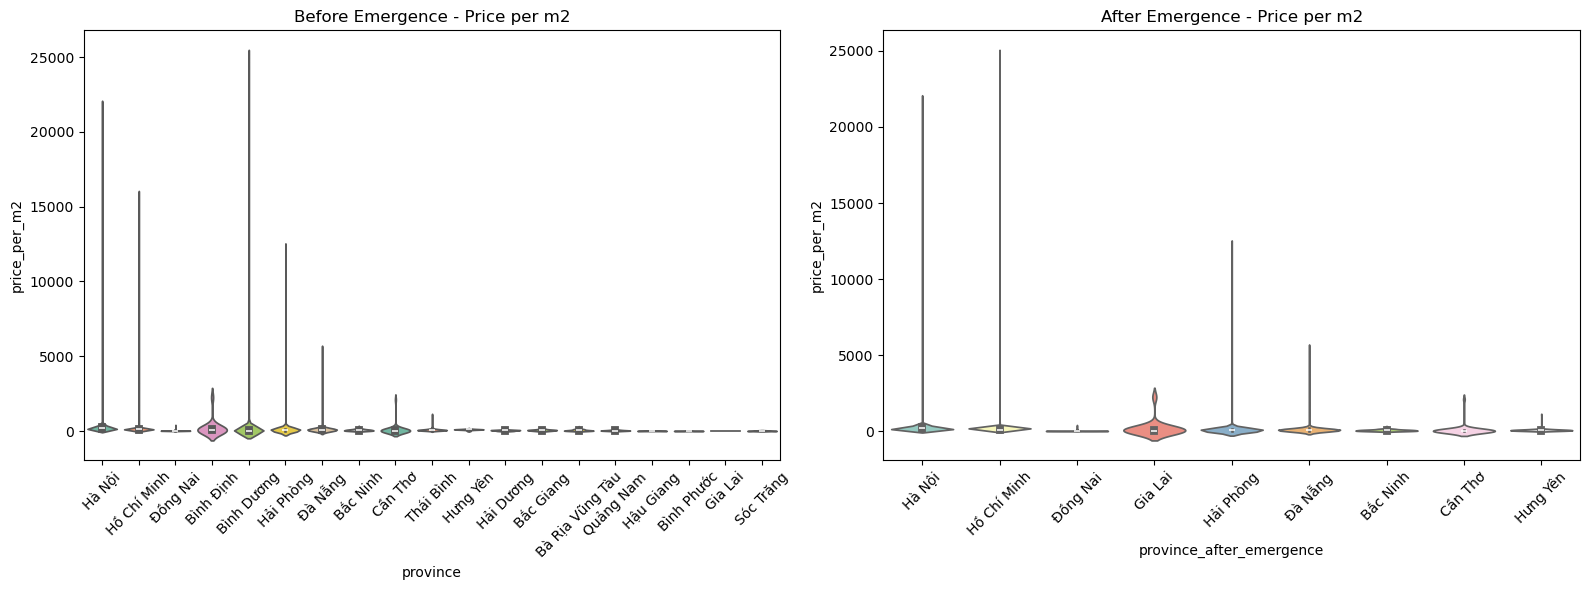

In [170]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.violinplot(data = filtered_data, x = "province", y = "price_per_m2", ax = ax[0], palette = "Set2")
ax[0].set_title("Before Emergence - Price per m2")
ax[0].tick_params(axis = "x", rotation = 45)

sns.violinplot(data = filtered_data, x = "province_after_emergence", y = "price_per_m2", ax = ax[1], palette = "Set3")
ax[1].set_title("After Emergence - Price per m2")
ax[1].tick_params(axis = "x", rotation = 45)

plt.tight_layout()
plot_all[f"ppm2_emergence_t1"] = fig
plt.show()

In [171]:
# Change in median price per m2
median_before = filtered_data.groupby("province")["price_per_m2"].median().reset_index(name="median_price_before")
median_after = filtered_data.groupby("province_after_emergence")["price_per_m2"].median().reset_index(name="median_price_after")

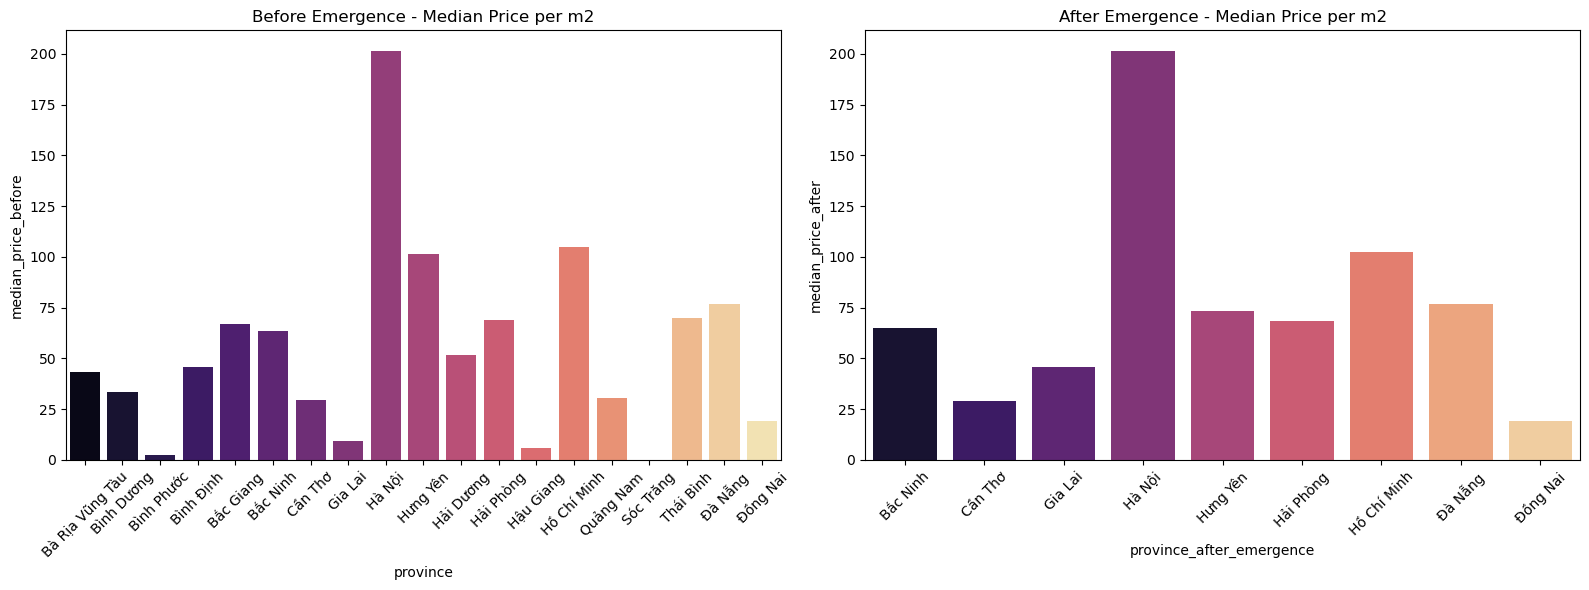

In [172]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(data = median_before, x = "province", y = "median_price_before", ax = ax[0], palette = "magma")
ax[0].set_title("Before Emergence - Median Price per m2")
ax[0].tick_params(axis = "x", rotation = 45)

sns.barplot(data = median_after, x = "province_after_emergence", y = "median_price_after", ax = ax[1], palette = "magma")
ax[1].set_title("After Emergence - Median Price per m2")
ax[1].tick_params(axis = "x", rotation = 45)

plt.tight_layout()
plot_all[f"med_ppm2_emergence_t1"] = fig
plt.show()

In [173]:
# Change in median price (without per m2)
median_origin_before = filtered_data.groupby("province")["price_million_vnd"].median().reset_index(name="median_price_origin_before")
median_origin_after = filtered_data.groupby("province_after_emergence")["price_million_vnd"].median().reset_index(name="median_price_origin_after")

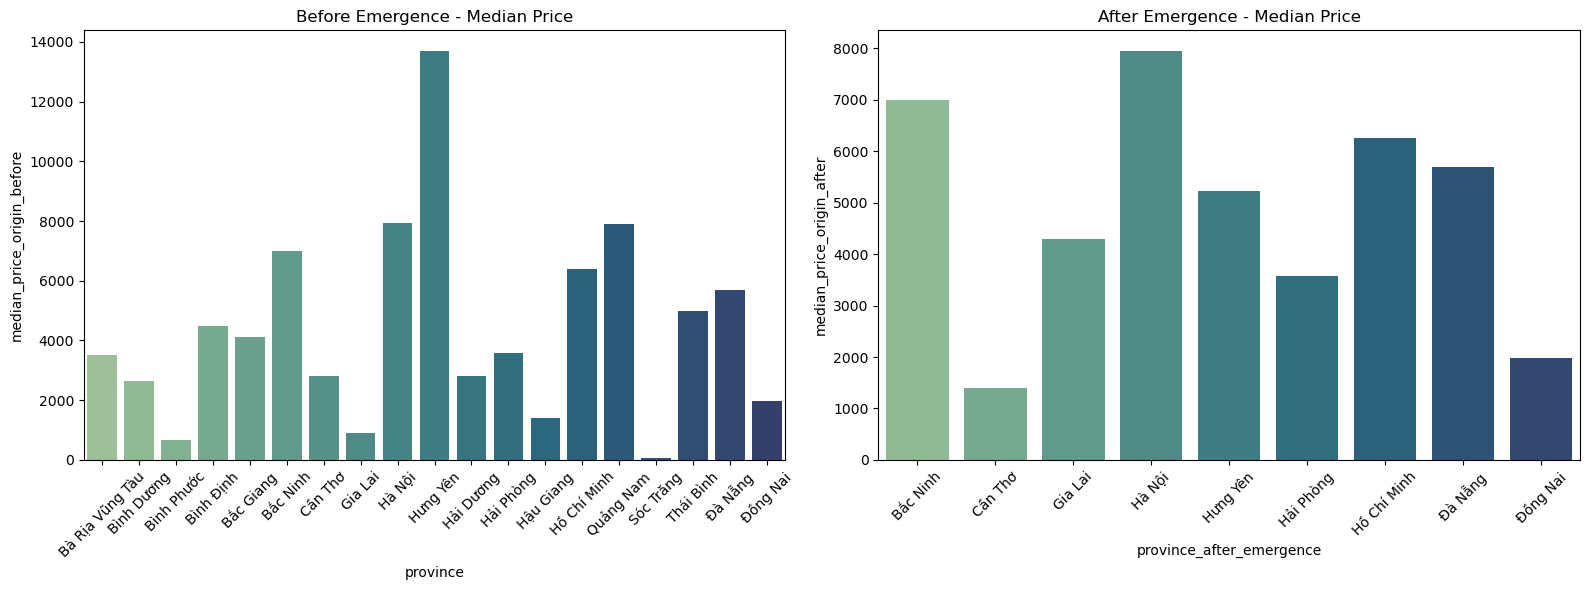

In [174]:
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.barplot(data = median_origin_before, x = "province", y = "median_price_origin_before", ax = ax[0], palette = "crest")
ax[0].set_title("Before Emergence - Median Price")
ax[0].tick_params(axis = "x", rotation = 45)

sns.barplot(data = median_origin_after, x = "province_after_emergence", y = "median_price_origin_after", ax = ax[1], palette = "crest")
ax[1].set_title("After Emergence - Median Price")
ax[1].tick_params(axis = "x", rotation = 45)

plt.tight_layout()
plot_all[f"mp_emergence_t1"] = fig
plt.show()

#### Task 2: Stock Rental Property Market – Sneaky Goblin’s Obsession Towards Treasures ####

#### 1. Location-based Insights ####

In [175]:
ward_counts = hr_location["ward"].value_counts()

# Top 20
top20_wards = ward_counts.head(20)
top20_df = hr_location[hr_location['ward'].isin(top20_wards.index)]

# Exclude top 20 wards
remaining_wards = ward_counts[~ward_counts.index.isin(top20_wards.index)]

# Random 20 wards except previous top 20 wards (if remaining < 20, take all)
least20_wards = remaining_wards.sample(n=min(20, len(remaining_wards)), random_state=42)

# Filter DataFrame
least20_df = hr_location[hr_location['ward'].isin(least20_wards.index)]

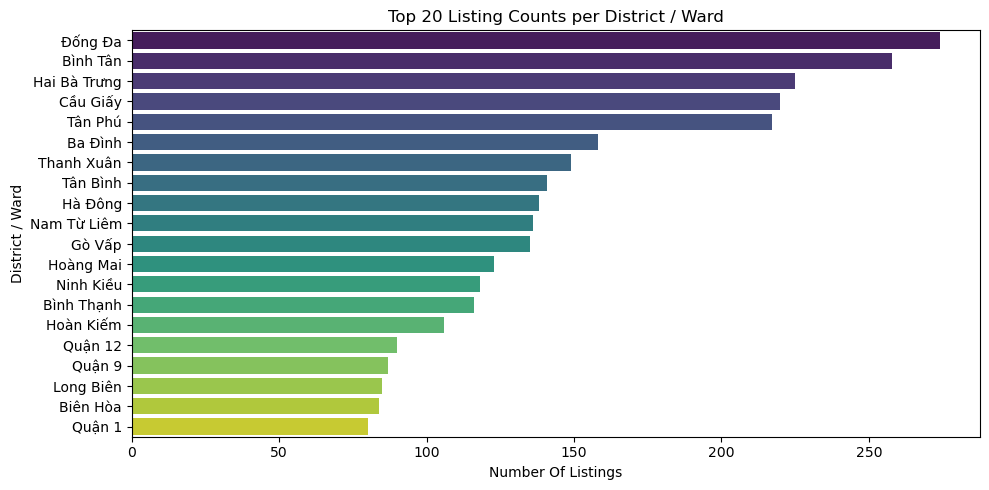

In [176]:
# Supply Distribution
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(y = "ward", data = top20_df, order = top20_df["ward"].value_counts().index, palette = "viridis", ax = ax)

ax.set_title("Top 20 Listing Counts per District / Ward")
ax.set_xlabel("Number Of Listings")
ax.set_ylabel("District / Ward")

plt.tight_layout()
plot_all[f"top20_listing_t2"] = fig
plt.show()

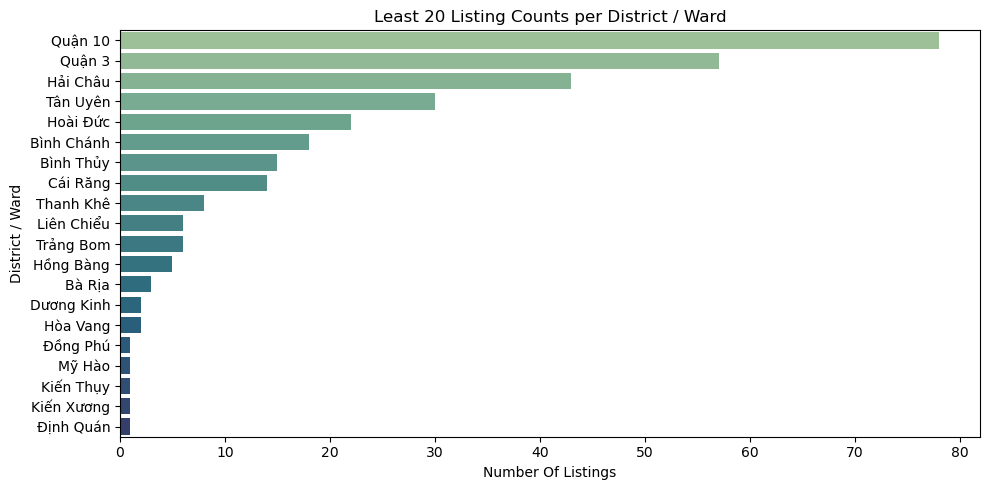

In [177]:
# Supply Distribution
fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(y = "ward", data = least20_df, order = least20_df["ward"].value_counts().index, palette = "crest", ax = ax)

ax.set_title("Least 20 Listing Counts per District / Ward")
ax.set_xlabel("Number Of Listings")
ax.set_ylabel("District / Ward")

plt.tight_layout()
plot_all[f"least20_listing_t2"] = fig
plt.show()

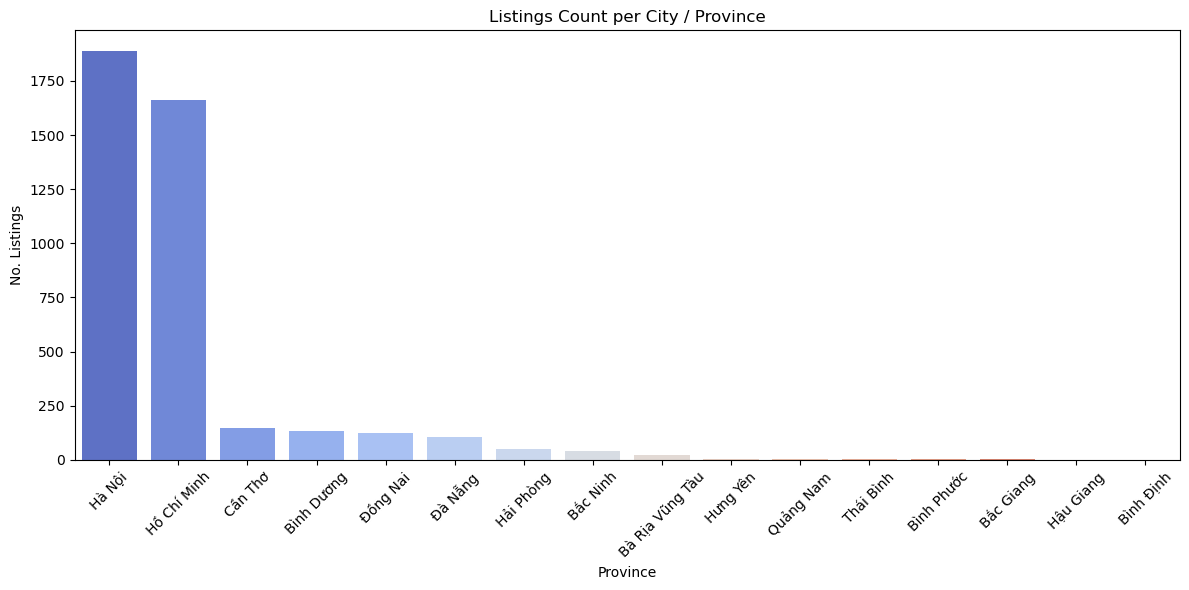

In [178]:
# Listings per city / province
province_counts = hr_location["province"].value_counts()

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x = province_counts.index, y = province_counts.values, palette = "coolwarm", ax = ax)

ax.set_title("Listings Count per City / Province")
ax.set_ylabel("No. Listings")
ax.set_xlabel("Province")
plt.xticks(rotation = 45)
plt.tight_layout()
plot_all[f"per_listing_t2"] = fig
plt.show()

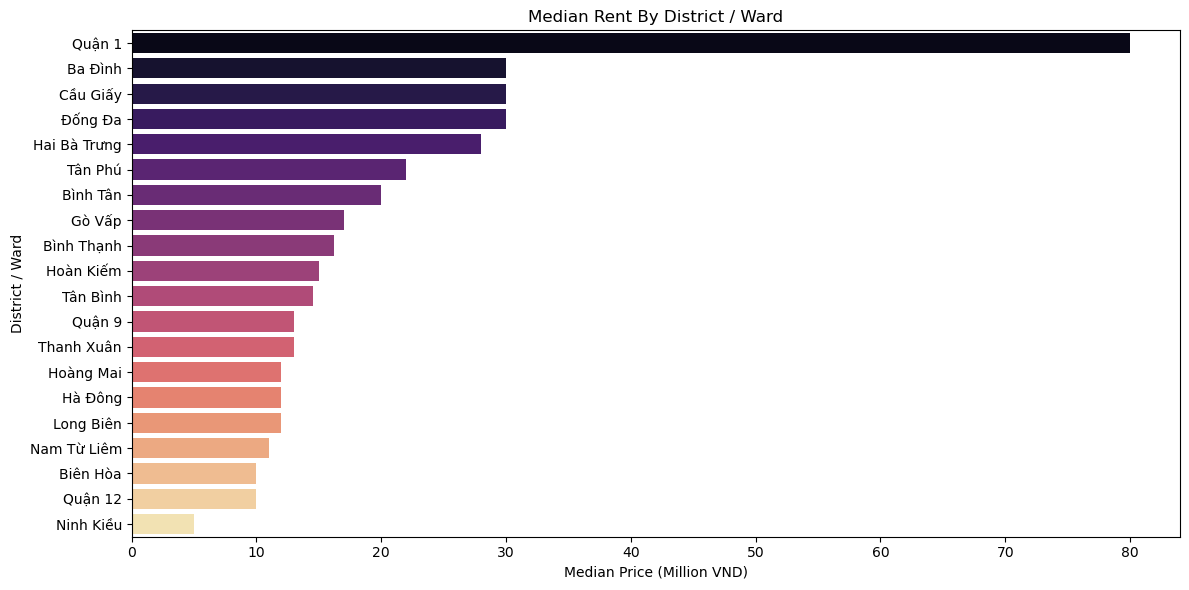

In [179]:
# Median rent by popular district (Top 20)
median_price_top20 = top20_df.groupby("ward")["price_million_vnd"].median().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x = median_price_top20.values, y = median_price_top20.index, palette = "magma", ax = ax)

ax.set_title("Median Rent By District / Ward")
ax.set_xlabel("Median Price (Million VND)")
ax.set_ylabel("District / Ward")
plt.tight_layout()
plot_all[f"med_prov_t2"] = fig
plt.show()

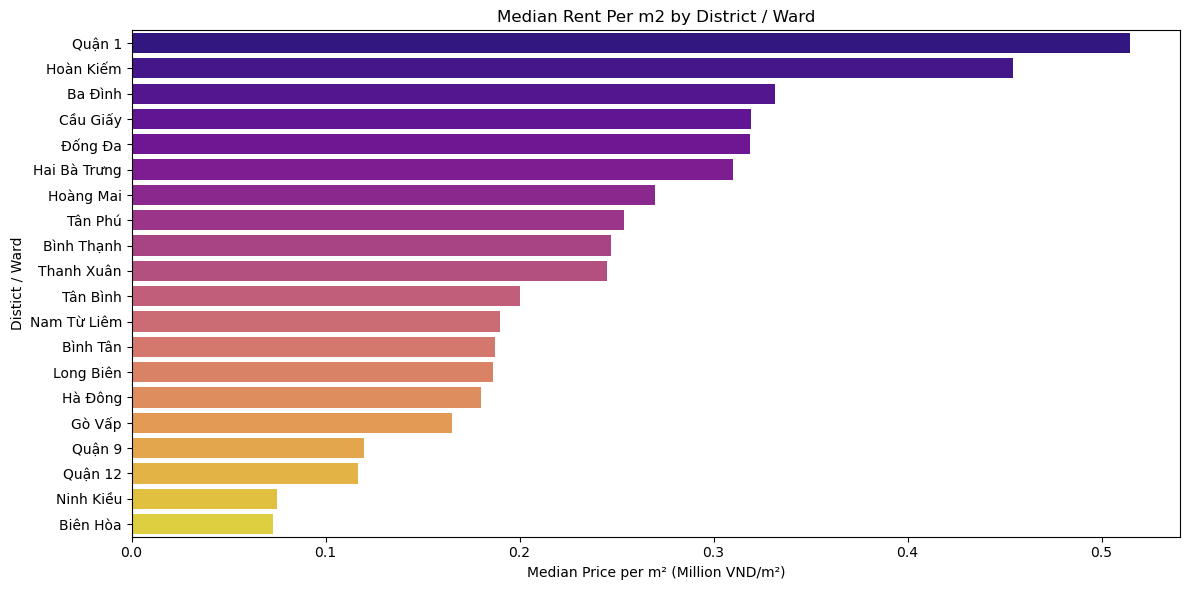

In [180]:
# Rent per m2 by popular district (Top 20)
top20_df["price_per_m2"] = top20_df["price_million_vnd"] / top20_df["area_m2"]
median_ppm2_ward = top20_df.groupby("ward")["price_per_m2"].median().sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (12, 6))

sns.barplot(x = median_ppm2_ward.values, y = median_ppm2_ward.index, palette = "plasma", ax = ax)

ax.set_title("Median Rent Per m2 by District / Ward")
ax.set_xlabel("Median Price per m² (Million VND/m²)")
ax.set_ylabel("Distict / Ward")
plt.tight_layout()
plot_all[f"med_ppm2_t2"] = fig
plt.show()

#### 2. Rental Price Structure ####

In [181]:
rental_pipeline = PreprocessingPipeline([
    # Outliers Removers (Numeric) 
    IQRMethod(columns = ["area_m2", "price_million_vnd"]),
])

rental_dist = rental_pipeline.fit_transform(hr_price)

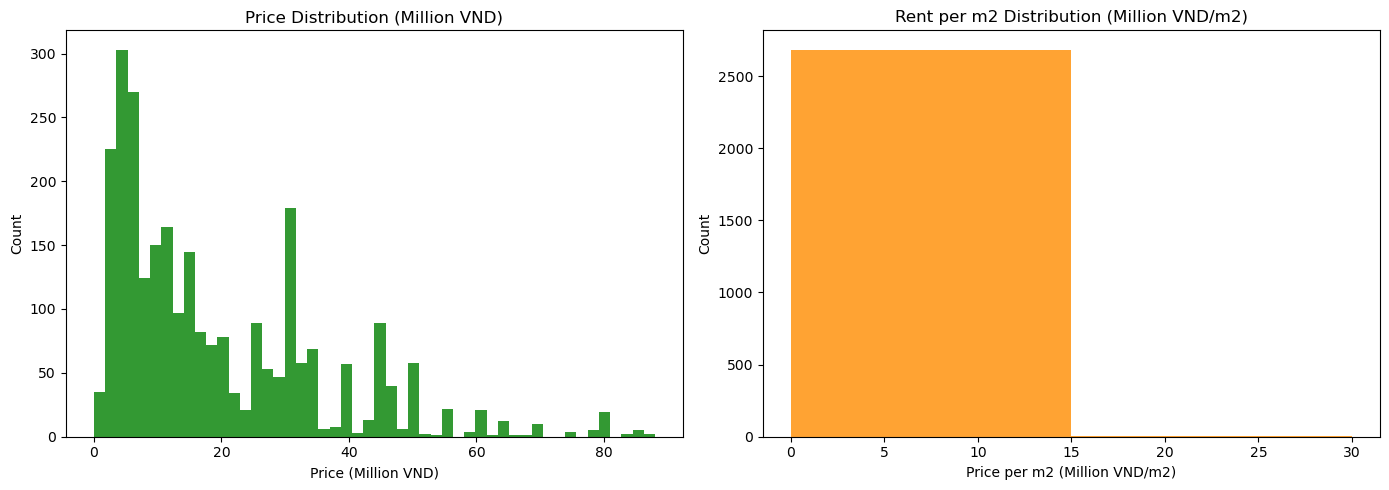

In [182]:
# Price distribution
fig, ax = plt.subplots(1, 2, figsize = (14, 5))

ax[0].hist(rental_dist["price_million_vnd"], bins=50, color='green', alpha=0.8)
ax[0].set_title("Price Distribution (Million VND)")
ax[0].set_xlabel("Price (Million VND)")
ax[0].set_ylabel("Count")

ax[1].hist(rental_dist["price_million_vnd"] / rental_dist["area_m2"], bins=2, color='darkorange', alpha=0.8)
ax[1].set_title("Rent per m2 Distribution (Million VND/m2)")
ax[1].set_xlabel("Price per m2 (Million VND/m2)")
ax[1].set_ylabel("Count")

plt.tight_layout()
plot_all[f"price_rent_ppm2_t2"] = fig
plt.show()

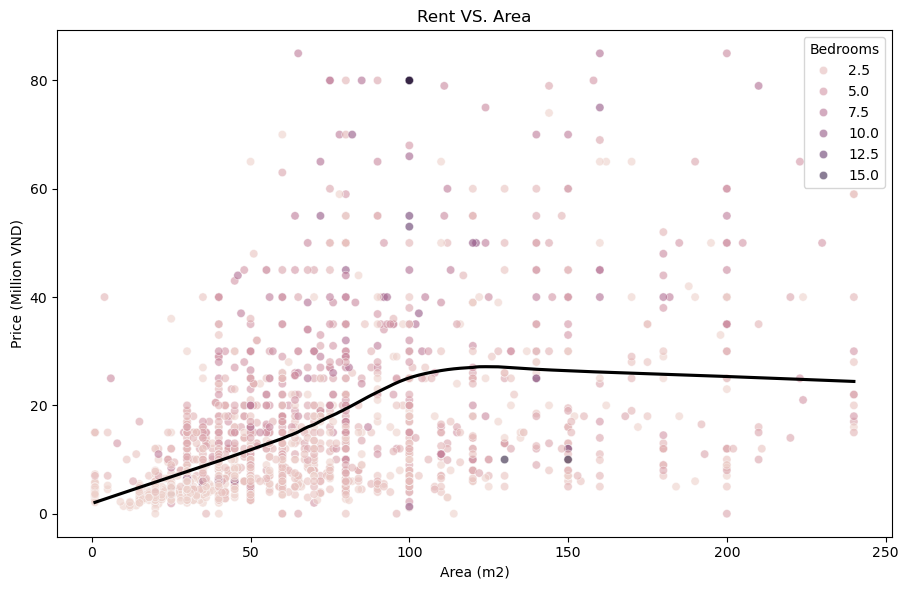

In [183]:
# Relationship with continuous attributes
fig, ax = plt.subplots(figsize = (10, 6))

sns.scatterplot(data = rental_dist, x = "area_m2", y = "price_million_vnd", hue = "bedrooms", alpha = 0.6, ax = ax)
sns.regplot(data = rental_dist, x = "area_m2", y = "price_million_vnd", scatter = False, color = "black", lowess = True, ax = ax)

ax.set_title("Rent VS. Area")
ax.set_xlabel("Area (m2)")
ax.set_ylabel("Price (Million VND)")
plt.legend(title = "Bedrooms", bbox_to_anchor=(1, 1))
plt.tight_layout()
plot_all[f"rent_area_t2"] = fig
plt.show()

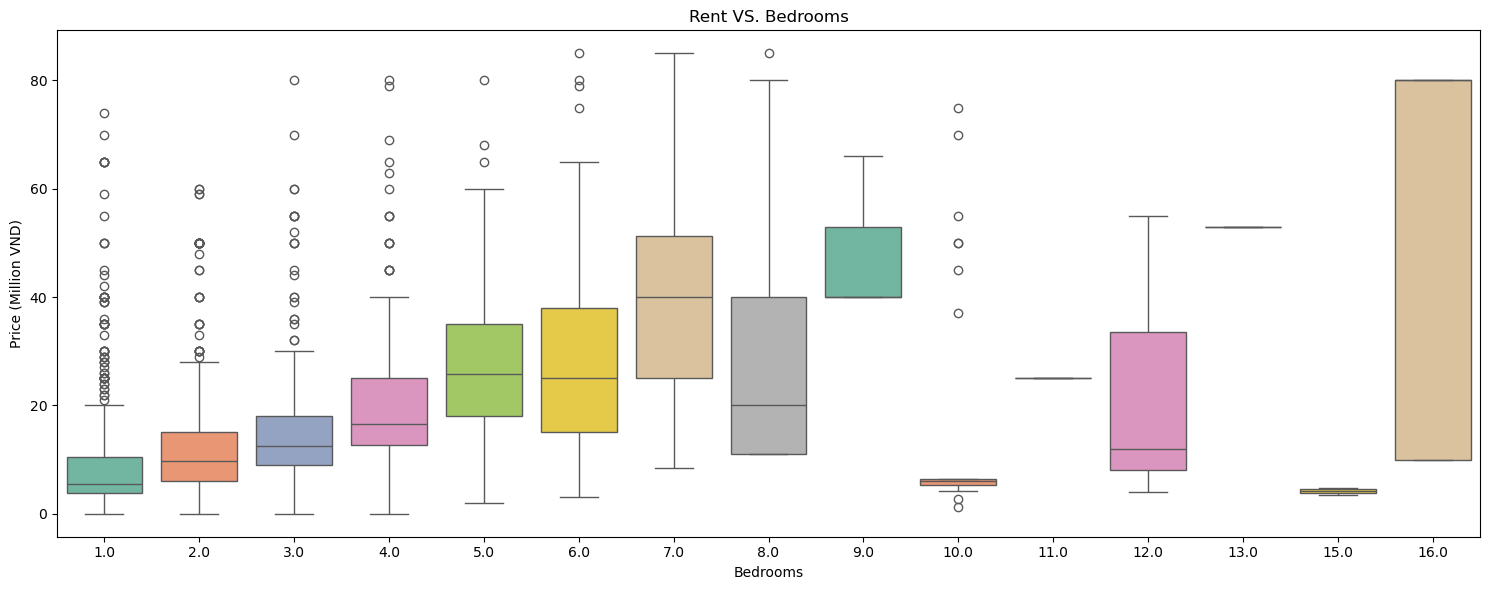

In [184]:
# Price VS. Bedrooms
fig, ax = plt.subplots(figsize = (15, 6))

sns.boxplot(x = "bedrooms", y = "price_million_vnd", data = rental_dist, palette = "Set2", ax = ax)

ax.set_title("Rent VS. Bedrooms")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Price (Million VND)")
plt.tight_layout()
plot_all[f"rent_bed_t2"] = fig
plt.show()

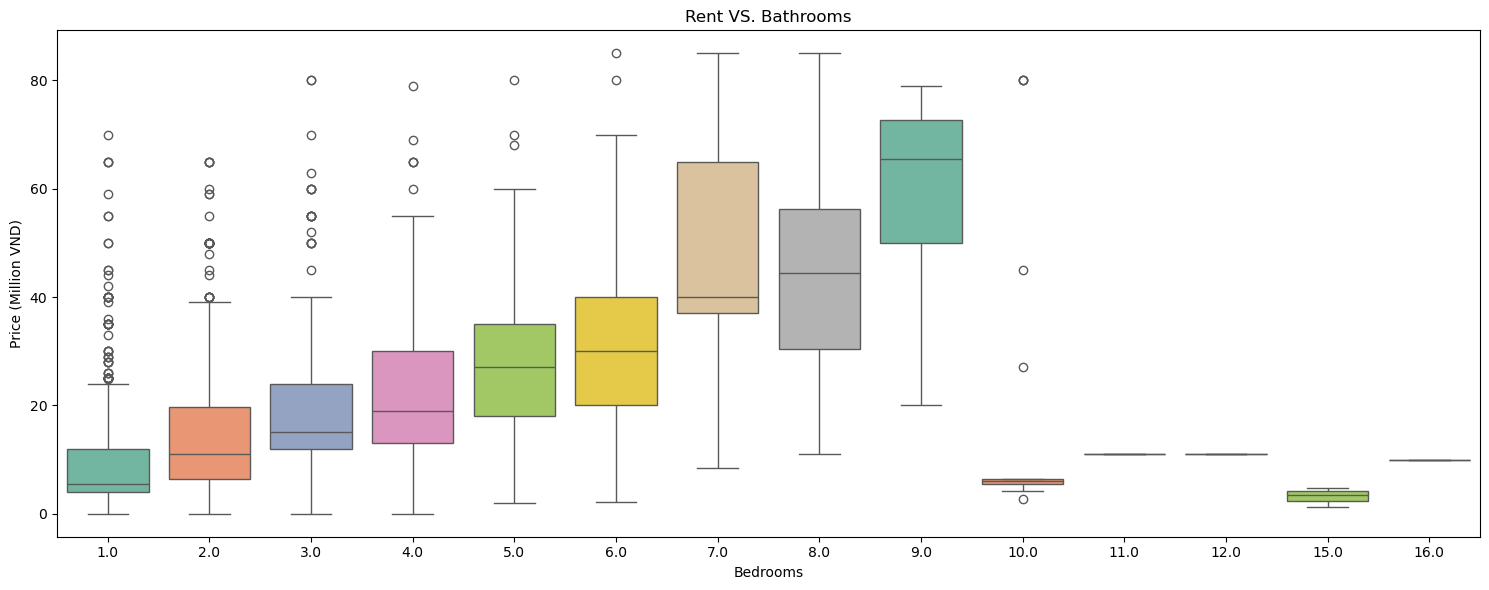

In [185]:
# Price VS. Bathrooms
fig, ax = plt.subplots(figsize = (15, 6))

sns.boxplot(x = "bathrooms", y = "price_million_vnd", data = rental_dist, palette = "Set2")

ax.set_title("Rent VS. Bathrooms")
ax.set_xlabel("Bedrooms")
ax.set_ylabel("Price (Million VND)")
plt.tight_layout()
plot_all[f"rent_bath_t2"] = fig
plt.show()

#### 3. House Features & Layout Interpretation ####

In [186]:
size_pipeline = PreprocessingPipeline([
    # Outliers Removers (Numeric) 
    IQRMethod(columns = ["area_m2"]),
])

location_pipeline = PreprocessingPipeline([
    # Outliers Removers (Numeric) 
    IQRMethod(columns = ["area_m2"]),
])

rental_size_dist = size_pipeline.fit_transform(hr_size)
rental_location_list = location_pipeline.fit_transform(hr_location)

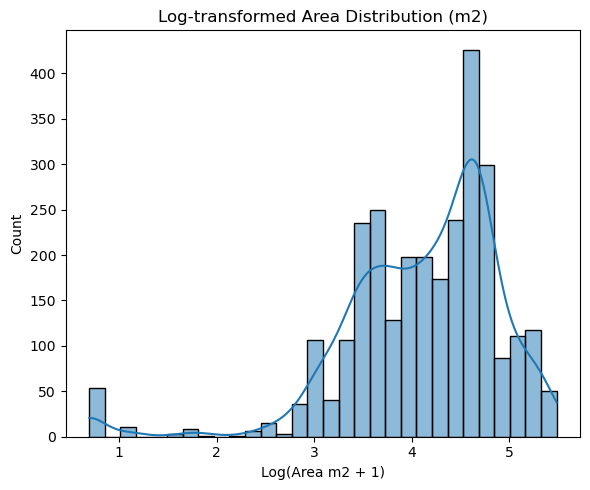

In [187]:
# Area distribution
fig, ax = plt.subplots(figsize = (6, 5))

sns.histplot(np.log1p(rental_size_dist["area_m2"]), kde = True, bins = 30, ax = ax)

ax.set_title("Log-transformed Area Distribution (m2)")
ax.set_xlabel("Log(Area m2 + 1)")
ax.set_ylabel("Count")
plt.tight_layout()
plot_all[f"log_area_dist_t2"] = fig
plt.show()

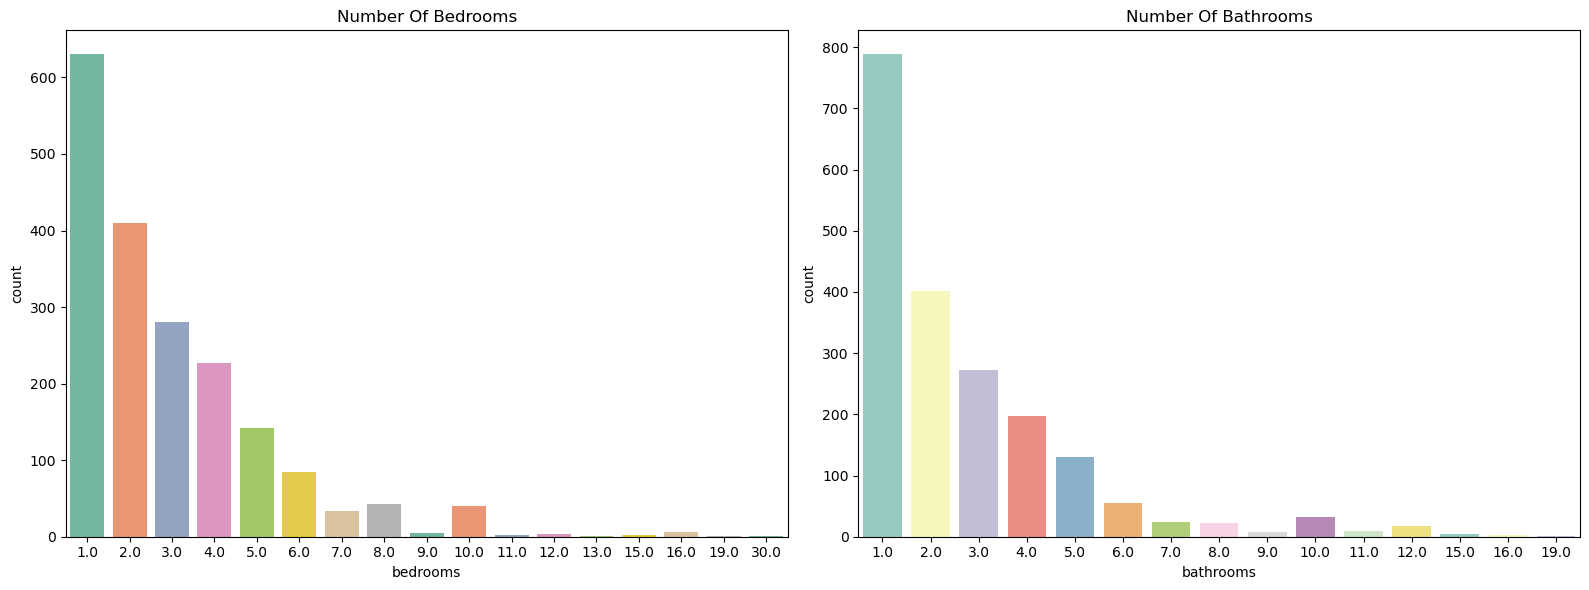

In [188]:
# Bedrooms & Bathrooms patterns
fig, ax = plt.subplots(1, 2, figsize = (16, 6))

sns.countplot(x = "bedrooms", data = rental_size_dist, ax = ax[0], palette = "Set2")
ax[0].set_title("Number Of Bedrooms")

sns.countplot(x = "bathrooms", data = rental_size_dist, ax = ax[1], palette = "Set3")
ax[1].set_title("Number Of Bathrooms")

plt.tight_layout()
plot_all[f"bed_bath_t2"] = fig
plt.show()

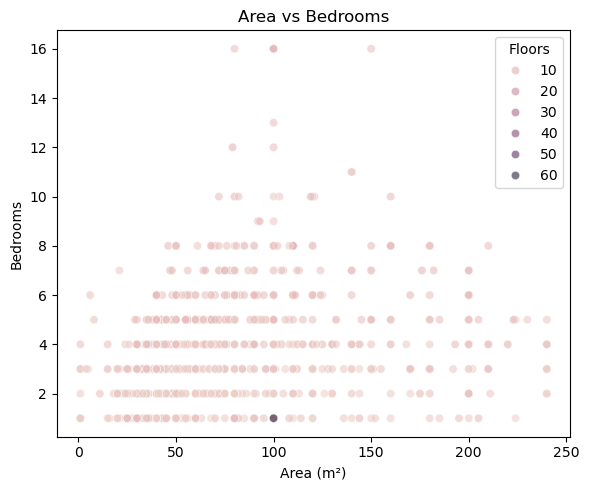

In [189]:
# Area VS. Bedrooms
fig, ax = plt.subplots(figsize = (6, 5))

sns.scatterplot(x = "area_m2", y = "bedrooms", hue = "floors", data = rental_size_dist, alpha = 0.6, ax = ax)

ax.set_title("Area vs Bedrooms")
ax.set_xlabel("Area (m²)")
ax.set_ylabel("Bedrooms")
plt.legend(title='Floors', bbox_to_anchor=(1,1))
plt.tight_layout()
plot_all[f"area_bed_t2"] = fig
plt.show()

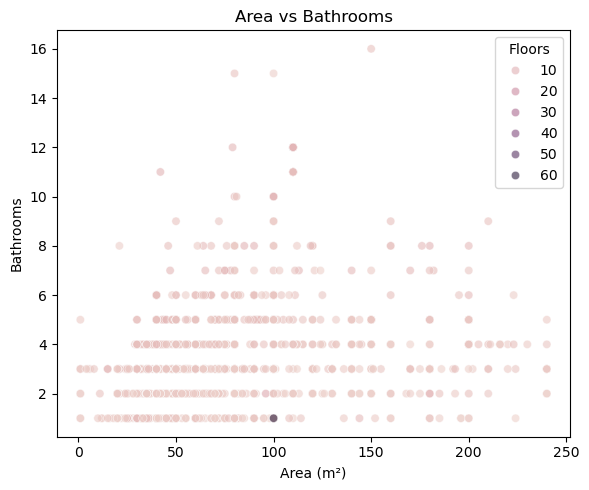

In [190]:
# Area VS. Bathrooms
fig, ax = plt.subplots(figsize = (6, 5))

sns.scatterplot(x = "area_m2", y = "bathrooms", hue = "floors", data = rental_size_dist, alpha = 0.6, ax = ax)

ax.set_title("Area vs Bathrooms")
ax.set_xlabel("Area (m²)")
ax.set_ylabel("Bathrooms")
plt.legend(title='Floors', bbox_to_anchor=(1,1))
plt.tight_layout()
plot_all[f"area_bath_t2"] = fig
plt.show()

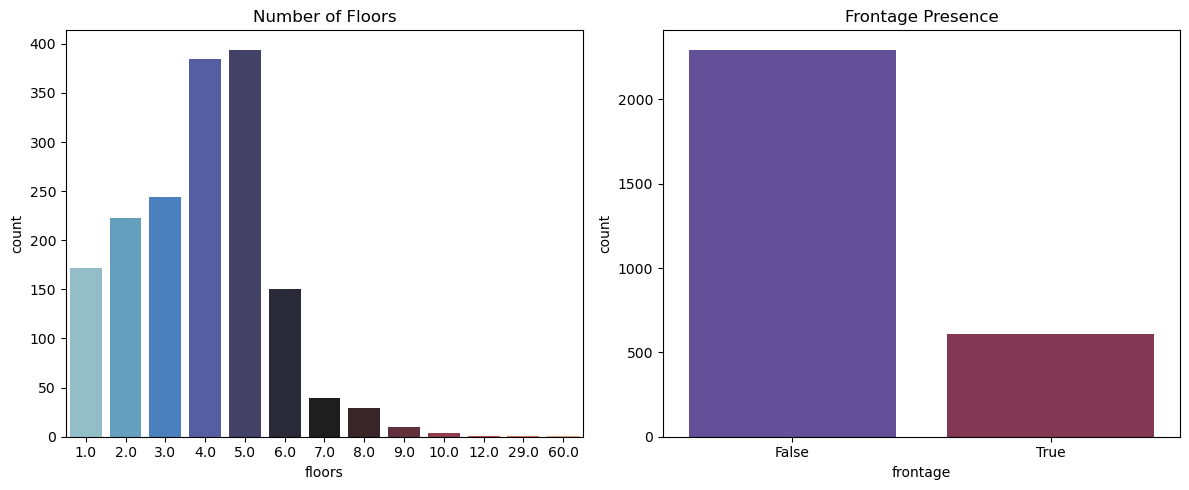

In [191]:
# Floors & Frontage Counts
fig, ax = plt.subplots(1, 2, figsize = (12, 5))

sns.countplot(x = "floors", data = rental_location_list, ax = ax[0], palette = "icefire")
ax[0].set_title("Number of Floors")

sns.countplot(x = "frontage", data = rental_location_list, ax = ax[1], palette = "twilight")
ax[1].set_title("Frontage Presence")

plt.tight_layout()
plot_all[f"floor_frontage_t2"] = fig
plt.show()

#### 4. Date / Listing Dynamics ####

In [192]:
# 20% sample of respective datasets (2025)
sample_timeline = hr_timeline[hr_timeline["year"] == 2025].sample(frac = 0.2, random_state = 42)

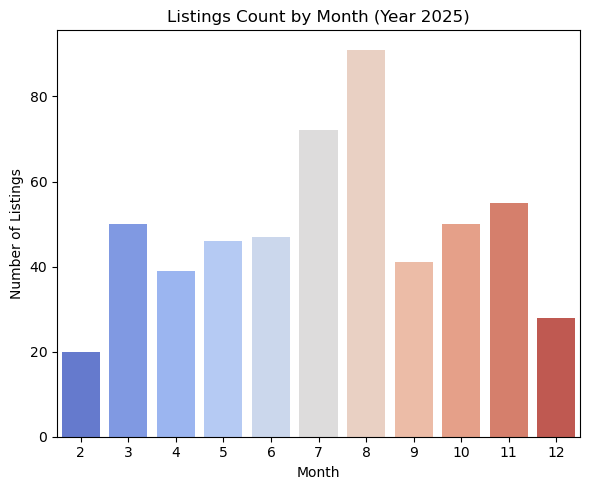

In [193]:
# Listing release by month 
fig, ax = plt.subplots(figsize = (6, 5))

sns.countplot(x = "month", data = sample_timeline, palette = "coolwarm", ax = ax)
ax.set_title("Listings Count by Month (Year 2025)")
ax.set_xlabel("Month")
ax.set_ylabel("Number of Listings")

plt.tight_layout()
plot_all[f"listing_count_2025_t2"] = fig
plt.show()

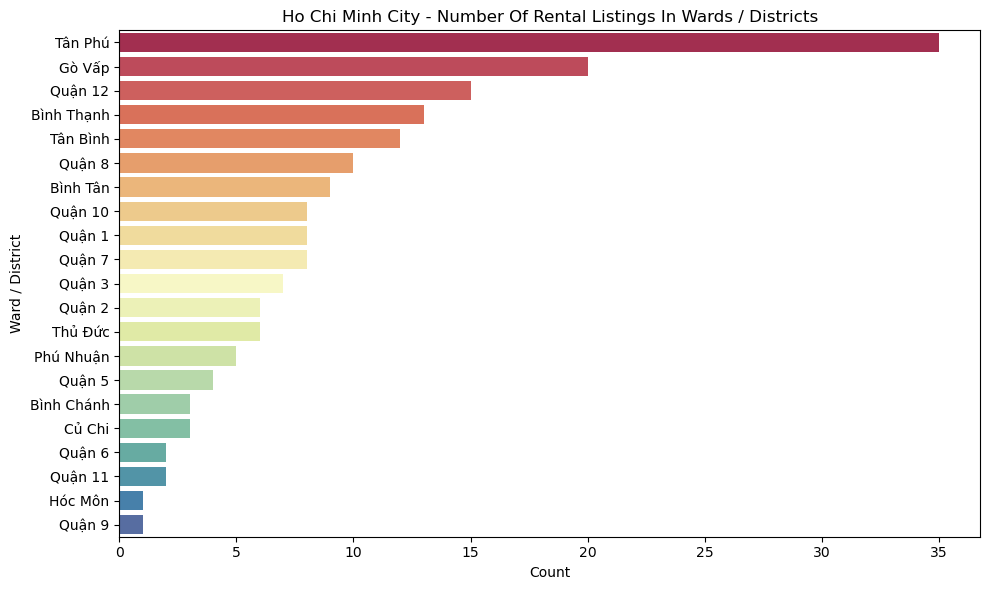

In [194]:
hcm_df = sample_timeline[(sample_timeline["province"] == "Hồ Chí Minh")]

fig, ax = plt.subplots(figsize = (10, 6))

sns.countplot(data = hcm_df, y = "ward", order = hcm_df["ward"].value_counts().index, palette = "Spectral", ax = ax)

ax.set_title("Ho Chi Minh City - Number Of Rental Listings In Wards / Districts")
ax.set_xlabel("Count")
ax.set_ylabel("Ward / District")

plt.tight_layout()
plot_all[f"hcm_listing_t2"] = fig
plt.show()

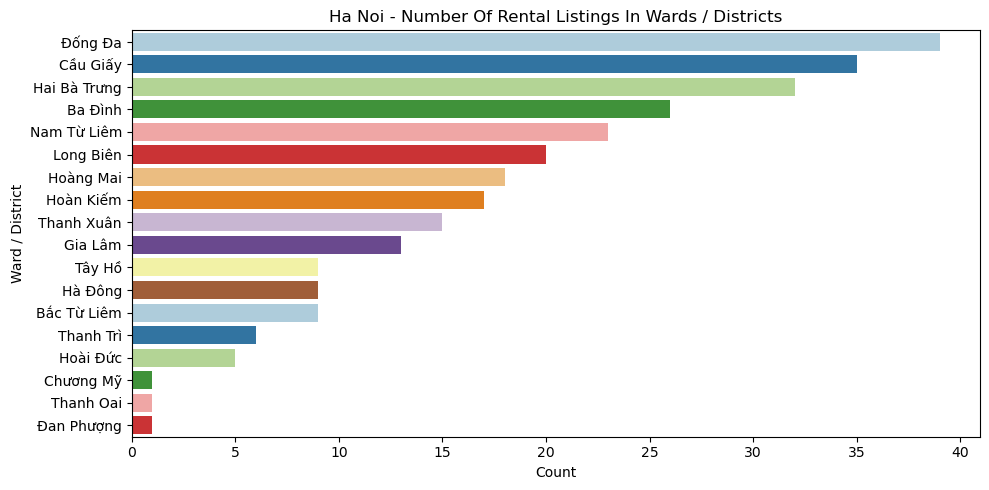

In [195]:
hn_df = sample_timeline[(sample_timeline["province"] == "Hà Nội")]

fig, ax = plt.subplots(figsize = (10, 5))

sns.countplot(data = hn_df, y = "ward", order = hn_df["ward"].value_counts().index, palette = "Paired", ax = ax)

ax.set_title("Ha Noi - Number Of Rental Listings In Wards / Districts")
ax.set_xlabel("Count")
ax.set_ylabel("Ward / District")

plt.tight_layout()
plot_all[f"hn_listing_t2"] = fig
plt.show()

In [196]:
danang_df = sample_timeline[(sample_timeline['province'] == "Đà Nẵng") & (sample_timeline['year'] == 2025)]

danang_df["date"] = pd.to_datetime(dict(year=danang_df.year, month=danang_df.month, day=1))

monthly_counts = danang_df.groupby("date").size()

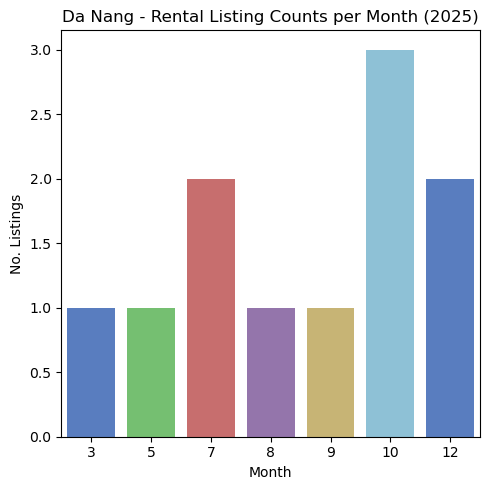

In [197]:
fig, ax = plt.subplots(figsize = (5, 5))

sns.countplot(data = danang_df, x = "month", order = sorted(danang_df["month"].unique()), palette = "muted6", ax = ax)

ax.set_title("Da Nang - Rental Listing Counts per Month (2025)")
ax.set_xlabel("Month")
ax.set_ylabel("No. Listings")

plt.tight_layout()
plot_all[f"dn_listing_t2"] = fig
plt.show()

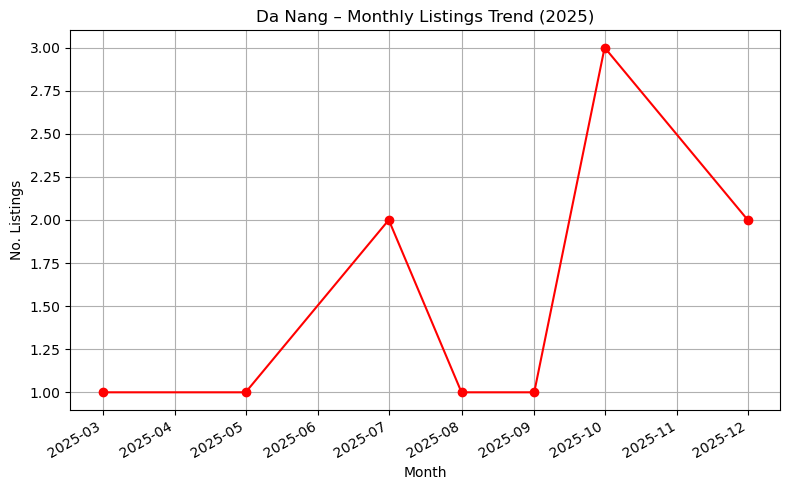

In [198]:
fig, ax = plt.subplots(figsize=(8,5))

monthly_counts.plot(kind='line', marker='o', color = "red", ax = ax)

ax.set_title("Da Nang – Monthly Listings Trend (2025)")
ax.set_xlabel("Month")
ax.set_ylabel("No. Listings")
plt.grid(True)

plt.tight_layout()
plot_all[f"dn_listing_trend_t2"] = fig
plt.show()

#### 5. Mobility Demand Indicators ####

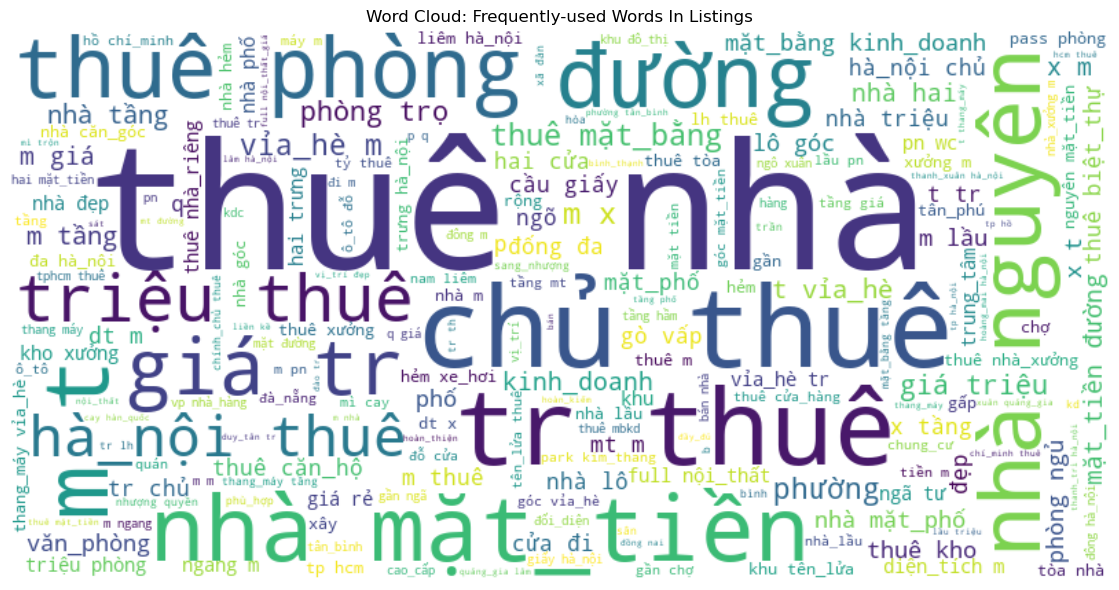

In [199]:
# Word cloud for popular words
text = " ".join(hr_text["cleaned_title"].dropna())
wordcloud = WordCloud(width = 800, height = 400, background_color = "white").generate(text)

fig, ax = plt.subplots(figsize = (12, 6))
ax.imshow(wordcloud, interpolation = "bilinear")
ax.axis("off")
ax.set_title("Word Cloud: Frequently-used Words In Listings")
plt.tight_layout()
plot_all[f"wc_rental_t2"] = fig
plt.show()

#### Task 3: Mobility Over Long-term Residency? ####

#### 🏡 Real Estate Perspectives 🏙️ ####

According to recent interviews from VNExpress, cited in the article "Rental Demand Increases As Young People Cannot Afford To Buy Houses", each primary-tier house in cities has a minimum price up to 3 billion VND, thus buyers need to make a loan at least 2 billion VND for the upcoming 15 - 25 years, additionally strip out 60% of the salary to cover the loss. If that happens, most people would prefer to rent a house periodically, whose remaining budgets would be used for skill acquisition, retirement, etc. 

This scenario was also reflected in recent research from VARS showing that over 60% of the young generation under 35 in major provinces (Ha Noi, Da Nang, Ho Chi Minh City, ...) consider renting as the optimal resolution to alleviate financial burdens amidst fluctuating real estate prices. Similarly, survey results from BatDongSan website reveal that the trend of rental properties increased by nearly 22% in 2024. Especially the group of customers aged 25-34 who sought most rentals with approximately 62%, and even the high-income one earning a monthly budget of  21-40 million VND also had a seeking rate of 42% last year.

This concern varies with contextual explanations. Notably, VARS describes that high housing prices and the lack of interest rate incentives are barriers preventing many people from buying homes, pushing them into the rental market. Nevertheless, apartment prices over the past few years in large cities have abruptly increased from 34% to 72%, while the average income of Vietnam citizens slightly increased by about 6 - 10% per year and remains relatively low (from 6.8 - 8.9 million VND per month). On average, borrowing 1.5 - 2 billion VND to buy a house requires monthly payments of principal and interest ranging from 25 - 60 million VND, which is 5 - 10 times higher than rental costs. Furthermore, BatDongSan states that over 41% of renters could not afford to buy, do not want to be tied down by a mortgage, and prefer inexpensive rental costs over monthly interest payments. Based on the estimated average GDP per capita of approximately 9.5 million VND per month (2024), a young person (aged 25 - 40) would need to accumulate at around 3 billion VND (assuming a deposit interest rate of 4.5% per year) for 26 years to afford a 60-square-meter apartment.

One remarkable shift has been observed in the younger group, as One Mount Group noticed that not only the core group is currently aged 35 - 44, but also the 18 - 34 generation also accounts for a relative proportion, with over 27% of home purchases. Another 2023 survey by PropertyGuru also points to a reversal in house buying trend by age group: the 22 - 26 age group increased from 13% in 2021 to 19% in 2023, the 27 - 30 age group increased from 39% to over 42%, while older age groups gradually declined.
In the context of culture, the young generation feels the sense of being homeownership leaves marks in their life: financial stability without extraneous support from families and friends, the need for privacies - workspaces, marriages & kids, as homeownership is widely associated with family formation, long-term residency, and a secure environment for upbringing children. Studies show that young adults perceive having real estate assets as providing a safer and more suitable space for family life, upgrading social status and enabling independence over domestic arrangements (Napiórkowska-Baryła et al., 2024). Homeownership in East Asian countries (particularly China) continues to carry strong cultural significance as a prerequisite for marriage, permanence and readiness for family responsibilities, even as younger generations adopt more flexible workarounds such as renting before buying (often seen in many social properties in Vietnam) or co-owning with partners (Xu & Sun, 2024). Moreover, this trend is linked to access to better educational opportunities for their youngsters and deeper senses of belonging, reinforcing its role as a foundation for long-term family planning among newly adults (Chi Jin et al., 2025).

In conclusion, the housing demand of Vietnamese, largely young generation, is increasingly categorized by a mixed orientation toward mobility and long-term residency rather than a binary (True / False) preference for renting or owning. Persistent affordability constraints, insufficient incomes, and mortgage burdens have reframed renting as a rational and flexible approach to support labor mobility, skill accumulation, and financial resilience during early years, whereas homeownership continues to retain as a long-term aspiration, as rooted by cultural expectations involving family formation, social status and permanence. Substantially, many young adults learn renting-phased trajectory during periods of career starting, while gradually preparing for settlement once previous personal aspects are stabilized. This evolving pattern suggests that mobility and long-term residency are not opposing demands but sequential and complementary stages within contemporary life, reflecting both structural economic pressures and enduring cultural values in Vietnam's general urban housing landscape.

<b> References </b>

- Duong, P. (2025). *Why are young Vietnamese buying more homes despite high prices?*. VNExpress. https://vnexpress.net/vi-sao-nguoi-tre-viet-tang-mua-nha-du-gia-cao-4939902.html
- Uyen, P. (2025). *Rental demand increases as young people cannot afford to buy houses*. VNExpress. https://vnexpress.net/nhu-cau-thue-tang-khi-nguoi-tre-khong-mua-noi-nha-4870651.html
- Nur Imam Saifuloh, Anas Iswanto Anwar. (2023). *Preferences of the Young Generation toward Housing: Is The Opportunity for Islamic Banks?*. Proceeding of International Conference on Islamic Philantrophy, (1)70-80. https://doi.org/10.24090/icip.v1i1.304.
- Chi Jin, Bo Li, Sylvia J., Harry, J. & Peter, J. (2025). *What drives young talents’ home-buying intentions? Evidence from China’s first-tier cities*. Journal of Housing and the Built Environment. Springer. https://doi.org/10.1007/s10901-025-10259-1
- Wenhua Xu, & Jiangmin Sun. (2024). *The Housing Perspective of the New Generation Dual-Income Families: Changes in Young People’s Attitudes Toward Marriage and Homeownership*. Insights in Social Science, 2(1), 1–9. Retrieved from https://www.brilliance-pub.com/ISS/article/view/50
- Napiórkowska-Baryła, Agnieszka & Świdyńska, Natalia & Witkowska-Dąbrowska, Mirosława. (2024). *Owning versus Renting a Home—Prospects for Generation Z*. Sustainability. 16(11), 4715. https://doi.org/10.3390/su16114715



#### 💽 Empirical Results 🗜️ ####

<h3 style="text-align: center; font-weight: bold;">
  -------------- COMING SOON --------------
</h3>

### 📥 Savestates 🔖 ###

To ensure reproducibility (any adjustments to the dataset or target visualisations) and proper output management, all generated plots are stored in a Python dictionary mapping descriptive figures to objects. A dedicated save method iterates over this mapping and exports each figure to a predefined file directory, which also supports both Matplotlib and Plotply figures and writes under more specified formats (e.g., PNG), creating the target directory if not already existed.

#### All-in-one Visualisation Capture ####

In [200]:
def save_all_figs(fig_dict, folder="reports/figures", formats=("png",)):
    # Resolve target folder correctly
    root = Path.cwd().resolve().parent          # catalyst/
    target_folder = root / folder               # catalyst/reports/figures
    target_folder.mkdir(parents=True, exist_ok=True)

    for name, fig in fig_dict.items():
        # Build base filepath in the resolved target folder
        for fmt in formats:
            filepath = target_folder / f"{name}.{fmt}"
            # Matplotlib
            if isinstance(fig, matplotlib.figure.Figure):
                fig.savefig(filepath, bbox_inches="tight")
            # Plotly
            elif isinstance(fig, go.Figure):
                pio.write_image(fig, filepath)
            else:
                raise NotImplementedError(
                    f"Invalid figure type for '{name}'. "
                    "Expected Matplotlib Figure or Plotly Figure."
                )
        print(f"Saved {name}: {', '.join(formats)}")

In [201]:
save_all_figs(plot_all)

Saved area_dist_shallow: png
Saved bed_dist_shallow: png
Saved bath_dist_shallow: png
Saved floor_dist_shallow: png
Saved price_dist_shallow: png
Saved corr_dist_shallow: png
Saved ba_buying_dist_shallow: png
Saved ba_rental_dist_shallow: png
Saved ba_rental_dist_t1: png
Saved top20_wards_t1: png
Saved avg_hp_t1: png
Saved max_min_price_t1: png
Saved hp_price_dist_t1: png
Saved price_dist_prov_t1: png
Saved ppm2_prov_t1: png
Saved ps_t1: png
Saved frontage_comp_t1: png
Saved price_floor_t1: png
Saved frontage_floors_province_t1: png
Saved area_bed_bath_t1: png
Saved province_size_t1: png
Saved med_ppm2_t1: png
Saved monthly_med_ppm2_t1: png
Saved wc_t1: png
Saved ppm2_emergence_t1: png
Saved med_ppm2_emergence_t1: png
Saved mp_emergence_t1: png
Saved top20_listing_t2: png
Saved least20_listing_t2: png
Saved per_listing_t2: png
Saved med_prov_t2: png
Saved med_ppm2_t2: png
Saved price_rent_ppm2_t2: png
Saved rent_area_t2: png
Saved rent_bed_t2: png
Saved rent_bath_t2: png
Saved log_area

### ❌ Acknowledgement 🧩 ###

This exploratory data analysis (EDA) was established as an initial step toward understanding the structure, characterisitcs (potential patterns behind house properties), and challenges of real estate buying and rental datasets. The availability of dataset provides rich and diverse attributes covering property structure, pricing, location and temporal information.

Special appreciation is given to the scraping procedure, which takes as much time as other familiar processes plus innumerable attempts to obtain near comprehensive results. Furthermore, platform processes like BatDongSanVN have enabled access to large-scale, real-world housing listings, making it possible to perceive realistic market behaviours, user preferences and pricing pattern recognition. Indepth analysis also benefited from standard data science practices, open-source analytical tools, as well as software engineering principles that supported efficient data inspection, visualisation and statistical summary.

### 🎯 Conclusion & Next Steps ⏩ ###

This EDA provides a comprehensive overview of both buying and rental real estate datasets, revealing meaningful insights into property characteristics, price behaviour and data quality issues. Based on the assumptions from this notebook, the following procedures are taken into implementation:

- <b>🔧 Data Preprocessing</b>
- <b> 📈 Machine Learning Injection 🧪</b>
- <b> 🔬 Evaluation & Validation 🗳️ </b>


### ❯❯❯❯  Coming Soon: Feature Engineering ⚡ ###